In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.impute import KNNImputer




In [2]:
ensia_df = pd.read_csv("data/ENSIA_stud_data.csv")
ensia_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/ENSIA_stud_data.csv'

In [3]:
ensia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 61 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                             --------------  -----  
 0   What is your gender :                                                                                                                              275 non-null    object 
 1   In which year of your studies are you currently enrolled:                                                                                          275 non-null    object 
 2   What was your BAC specialty :                                                                                                                      275 non-null    object 
 3   How many h

In [4]:
ensia_df.columns

Index(['What is your gender :',
       'In which year of your studies are you currently enrolled:',
       'What was your BAC specialty :',
       'How many hours per week do you spend studying (personnal efforts):',
       'Where do you prefer to study:', 'You prefer to study: ',
       'What learning methods do help you understand better: ',
       'What types of resources do you use most:',
       'Do you use a planer or a schedule in your revisions :',
       'For the next 8 questions you will have a list of problems (obstacles) classify them according to how much they influence your studies:\n1. First :',
       '2. Second:', '3. Third:', '4. Forth:', '5. Fifth:', '6. sixth:',
       '7. seventh:', '8. eighth',
       'Rate your satisfaction with the school's program:',
       'Do you engage in any external activities (not related to the study field):',
       'Your level of motivation for joining ENSIA',
       'How much do you like the field of Artificial Intelligence :',
      

### **Renaming columns**





In [5]:
ensia_df.rename(columns={'What is your gender :': 'gender',
                         'In which year of your studies are you currently enrolled:': 'current_year',
                         'What was your BAC specialty :': 'bac_serie',
                         'How many hours per week do you spend studying (personnal efforts):': 'HpW_study',
                         'Where do you prefer to study:': 'pref_place_toStudy',
                         'You prefer to study: ': 'how_study_pref',
                         'What learning methods do help you understand better: ': 'learning_meth',
                         'What types of resources do you use most:': 'recources',
                         'Do you use a planer or a schedule in your revisions :': 'use_planner?',
                         'For the next 8 questions you will have a list of problems (obstacles) classify them according to how much they influence your studies:\n1. First :': '1st_obstcl',
                         '2. Second:': '2nd_obstcl',
                         '3. Third:': '3rd_obstcl',
                         '4. Forth:': '4th_obstcl',
                         '5. Fifth:': '5th_obstcl',
                         '6. sixth:': '6th_obstcl',
                         '7. seventh:': '7th_obstcl',
                         '8. eighth': '8th_obstcl',
                         'Rate your satisfaction with the school\'s program:': 'pov_school_prgrm',
                         'Do you engage in any external activities (not related to the study field):': 'external_act',
                         'Your level of motivation for joining ENSIA': 'motiv_join_ENSIA',
                         'How much do you like the field of Artificial Intelligence :': 'like_ai',
                         'How do others\' feedbacks influence you:': 'infl_oth_feedback',
                         'How many hours do you sleep ': 'sleeping_hours',
                         'How well do you handle stress and pressure :': 'presure_handling',
                         'In a scale of 1 to 10 how do you rate your level in the following fields:\n1. English:': 'English',
                         '2. Programming:\n': 'Programming',
                         '3. Computer science:': 'Computer_science',
                         '4. Mathematics': 'Mathematics'}, inplace=True)


# Nouvelle section

In [6]:
ensia_df.columns

Index(['gender', 'current_year', 'bac_serie', 'HpW_study',
       'pref_place_toStudy', 'how_study_pref', 'learning_meth', 'recources',
       'use_planner?', '1st_obstcl', '2nd_obstcl', '3rd_obstcl', '4th_obstcl',
       '5th_obstcl', '6th_obstcl', '7th_obstcl', '8th_obstcl',
       'pov_school_prgrm', 'external_act', 'motiv_join_ENSIA', 'like_ai',
       'infl_oth_feedback', 'sleeping_hours', 'presure_handling', 'English',
       'Programming', 'Computer_science', 'Mathematics',
       '1Y_Intensive english', '1Y_Seminar', '1Y_CPSCT', '1Y_Analysis I',
       '1Y_Algebra', '1Y_A. Com. I', '1Y_Average S1', '1Y_Intro. Prog. C++',
       '1Y_Analysis II', '1Y_A. Com. II', '1Y_OOP', '1Y_Linear Algebra',
       '1Y_Proba Stat', '1Y_Average S2', '1Y_Average', '2Y_Analysis III',
       '2Y_DSA', '2Y_Archi 1', '2Y_Logic', '2Y_Complexity', '2Y_Proba Stat II',
       '2Y_Lin. Alg II', '2Y_DataBases', '2Y_Average S1', '2Y_Intro AI',
       '2Y_Oper. res', '2Y_Archi II', '2Y_Oper. Syst', '2Y_Soft

In [7]:
ensia_df

,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,learning_meth,recources,use_planner?,1st_obstcl,...,2Y_Average S1,2Y_Intro AI,2Y_Oper. res,2Y_Archi II,2Y_Oper. Syst,2Y_Soft. Eng.,2Y_Web Prog.,2Y_Intro. Busin.,2Y_Average S2,2Y_Average
0,Male,First year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents, YouTube vi...",No,Pressure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,Third year,Mathematics,10-17,In your room (dorms),In peer,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents",No,Teachers' teaching method,...,High,Moderate,Moderate,Moderate,High,High,High,High,12.0,13.0
2,Male,First year,Science,18-25,In your room (dorms),Alone,Lectures,Online documents,Yes,Private life problems,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,Third year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, YouTube videos",No,Bad quality of internet,...,High,Moderate,High,High,High,High,High,High,12.0,13.0
4,Female,Third year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Mind mapping...","Books, Online documents, YouTube videos",No,Teachers' teaching method,...,High,Low,Moderate,High,Moderate,High,Moderate,High,10.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Female,Second year,Mathematics,26-33,At home,Alone,"Lectures, Online courses and tutorials","Books, YouTube videos",No,Pressure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,Male,First year,Mathematics,18-25,In your room (dorms),With a group,"Learning by practicing, Online courses and tut...","Books, Online tutorials, Online documents, You...",No,Lack of time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,Male,First year,Mathematics,18-25,In your room (dorms),Alone,Lectures,Online documents,No,Bad quality of internet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Male,First year,Mathematics,18-25,In your room (dorms),In peer,"Learning by practicing, Online courses and tut...","Online documents, YouTube videos",No,Lack of time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ensia_df.isnull().mean()

gender                0.000000
current_year          0.000000
bac_serie             0.000000
HpW_study             0.000000
pref_place_toStudy    0.000000
                        ...   
2Y_Soft. Eng.         0.818182
2Y_Web Prog.          0.818182
2Y_Intro. Busin.      0.818182
2Y_Average S2         0.818182
2Y_Average            0.818182
Length: 61, dtype: float64

In [9]:
ensia_df.dtypes

gender                 object
current_year           object
bac_serie              object
HpW_study              object
pref_place_toStudy     object
                       ...   
2Y_Soft. Eng.          object
2Y_Web Prog.           object
2Y_Intro. Busin.       object
2Y_Average S2         float64
2Y_Average            float64
Length: 61, dtype: object

### **Checking duplications**

In [10]:
ensia_df[ensia_df.duplicated()]

,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,learning_meth,recources,use_planner?,1st_obstcl,...,2Y_Average S1,2Y_Intro AI,2Y_Oper. res,2Y_Archi II,2Y_Oper. Syst,2Y_Soft. Eng.,2Y_Web Prog.,2Y_Intro. Busin.,2Y_Average S2,2Y_Average


### **Studyin preferences**

In [11]:
study_pref = ensia_df[['HpW_study',
       'pref_place_toStudy', 'how_study_pref', 'learning_meth', 'recources',
       'use_planner?']]
study_pref

,HpW_study,pref_place_toStudy,how_study_pref,learning_meth,recources,use_planner?
0,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents, YouTube vi...",No
1,10-17,In your room (dorms),In peer,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents",No
2,18-25,In your room (dorms),Alone,Lectures,Online documents,Yes
3,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, YouTube videos",No
4,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Mind mapping...","Books, Online documents, YouTube videos",No
...,...,...,...,...,...,...
270,26-33,At home,Alone,"Lectures, Online courses and tutorials","Books, YouTube videos",No
271,18-25,In your room (dorms),With a group,"Learning by practicing, Online courses and tut...","Books, Online tutorials, Online documents, You...",No
272,18-25,In your room (dorms),Alone,Lectures,Online documents,No
273,18-25,In your room (dorms),In peer,"Learning by practicing, Online courses and tut...","Online documents, YouTube videos",No


### **Obstacles**

In [12]:
obstacles = ensia_df[['1st_obstcl', '2nd_obstcl', '3rd_obstcl', '4th_obstcl', '5th_obstcl', '6th_obstcl', '7th_obstcl', '8th_obstcl']]
obstacles

,1st_obstcl,2nd_obstcl,3rd_obstcl,4th_obstcl,5th_obstcl,6th_obstcl,7th_obstcl,8th_obstcl
0,Pressure,Private life problems,Lack of time,Teaching language,Not having a good (powerful) computer,Bad quality of internet,Lack of previous knowledge or experience in th...,Teachers' teaching method
1,Teachers' teaching method,Lack of time,Lack of previous knowledge or experience in th...,Pressure,Bad quality of internet,Private life problems,Not having a good (powerful) computer,Teaching language
2,Private life problems,Lack of time,Bad quality of internet,Pressure,Lack of previous knowledge or experience in th...,Teaching language,Teachers' teaching method,Not having a good (powerful) computer
3,Bad quality of internet,Lack of previous knowledge or experience in th...,Teachers' teaching method,Lack of time,Not having a good (powerful) computer,Pressure,Teaching language,Private life problems
4,Teachers' teaching method,Lack of previous knowledge or experience in th...,Pressure,Bad quality of internet,Private life problems,Lack of time,Teaching language,Not having a good (powerful) computer
...,...,...,...,...,...,...,...,...
270,Pressure,Lack of time,Teachers' teaching method,Lack of previous knowledge or experience in th...,Private life problems,Lack of time,Lack of time,Pressure
271,Lack of time,Bad quality of internet,Pressure,Teachers' teaching method,Lack of previous knowledge or experience in th...,Private life problems,Not having a good (powerful) computer,Teaching language
272,Bad quality of internet,Lack of time,Pressure,Private life problems,Teachers' teaching method,Not having a good (powerful) computer,Lack of previous knowledge or experience in th...,Teaching language
273,Lack of time,Pressure,Teachers' teaching method,Lack of previous knowledge or experience in th...,Bad quality of internet,Teaching language,Not having a good (powerful) computer,Private life problems


In [13]:
for obstacle in obstacles:
    print(obstacles[obstacle].value_counts().head(3))
    print()

1st_obstcl
Lack of time                 71
Pressure                     65
Teachers' teaching method    45
Name: count, dtype: int64

2nd_obstcl
Lack of time                 80
Pressure                     59
Teachers' teaching method    43
Name: count, dtype: int64

3rd_obstcl
Pressure                     59
Lack of time                 54
Teachers' teaching method    54
Name: count, dtype: int64

4th_obstcl
Lack of previous knowledge or experience in the field    71
Pressure                                                 39
Bad quality of internet                                  39
Name: count, dtype: int64

5th_obstcl
Bad quality of internet                                  59
Teachers' teaching method                                59
Lack of previous knowledge or experience in the field    41
Name: count, dtype: int64

6th_obstcl
Bad quality of internet    56
Teaching language          52
Private life problems      49
Name: count, dtype: int64

7th_obstcl
Not having a good (powe

###  **modules and courses**

In [14]:
modules = ensia_df[['English',
       'Programming', 'Computer_science', 'Mathematics',
       '1Y_Intensive english', '1Y_Seminar', '1Y_CPSCT', '1Y_Analysis I',
       '1Y_Algebra', '1Y_A. Com. I', '1Y_Average S1', '1Y_Intro. Prog. C++',
       '1Y_Analysis II', '1Y_A. Com. II', '1Y_OOP', '1Y_Linear Algebra',
       '1Y_Proba Stat', '1Y_Average S2', '1Y_Average', '2Y_Analysis III',
       '2Y_DSA', '2Y_Archi 1', '2Y_Logic', '2Y_Complexity', '2Y_Proba Stat II',
       '2Y_Lin. Alg II', '2Y_DataBases', '2Y_Average S1', '2Y_Intro AI',
       '2Y_Oper. res', '2Y_Archi II', '2Y_Oper. Syst', '2Y_Soft. Eng.',
       '2Y_Web Prog.', '2Y_Intro. Busin.', '2Y_Average S2', '2Y_Average']]
program = ensia_df[['1Y_Intensive english', '1Y_Seminar', '1Y_CPSCT', '1Y_Analysis I',
       '1Y_Algebra', '1Y_A. Com. I', '1Y_Average S1', '1Y_Intro. Prog. C++',
       '1Y_Analysis II', '1Y_A. Com. II', '1Y_OOP', '1Y_Linear Algebra',
       '1Y_Proba Stat', '1Y_Average S2', '1Y_Average', '2Y_Analysis III',
       '2Y_DSA', '2Y_Archi 1', '2Y_Logic', '2Y_Complexity', '2Y_Proba Stat II',
       '2Y_Lin. Alg II', '2Y_DataBases', '2Y_Average S1', '2Y_Intro AI',
       '2Y_Oper. res', '2Y_Archi II', '2Y_Oper. Syst', '2Y_Soft. Eng.',
       '2Y_Web Prog.', '2Y_Intro. Busin.', '2Y_Average S2', '2Y_Average']]
modules

,English,Programming,Computer_science,Mathematics,1Y_Intensive english,1Y_Seminar,1Y_CPSCT,1Y_Analysis I,1Y_Algebra,1Y_A. Com. I,...,2Y_Average S1,2Y_Intro AI,2Y_Oper. res,2Y_Archi II,2Y_Oper. Syst,2Y_Soft. Eng.,2Y_Web Prog.,2Y_Intro. Busin.,2Y_Average S2,2Y_Average
0,7,7,9,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,8,8,9,NaN,NaN,NaN,NaN,NaN,NaN,...,High,Moderate,Moderate,Moderate,High,High,High,High,12.0,13.0
2,8,5,7,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,8,8,8,NaN,NaN,NaN,NaN,NaN,NaN,...,High,Moderate,High,High,High,High,High,High,12.0,13.0
4,9,7,6,9,NaN,NaN,NaN,NaN,NaN,NaN,...,High,Low,Moderate,High,Moderate,High,Moderate,High,10.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,7,8,8,8,High,High,Very High,Very High,High,High,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,8,2,2,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,8,9,8,9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,7,5,8,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
unique_values_comm = []

for column in program.columns:
    unique_values = program[column].unique()
    unique_values_comm.extend(unique_values)

unique_values_comm = set(unique_values_comm)
unique_values_comm


{10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 7.0,
 8.0,
 9.0,
 'High',
 'Low',
 'Moderate',
 'Very High',
 'Very Low',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan}

In [16]:
program_new_values = {
    'High': range(13,16),
 'Low': range(5,8),
 'Moderate': range(9,12),
 'Very High': range(17,20),
 'Very Low': range(0,4),
}

for column in program.columns:
    program[column] = program[column].map(program_new_values)

program.head()

/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_86124/835617752.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  program[column] = program[column].map(program_new_values)
/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_86124/835617752.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  program[column] = program[column].map(program_new_values)
/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_86124/835617752.py:10: SettingWithCopyWarning: 
A value is trying to be set on a 

,1Y_Intensive english,1Y_Seminar,1Y_CPSCT,1Y_Analysis I,1Y_Algebra,1Y_A. Com. I,1Y_Average S1,1Y_Intro. Prog. C++,1Y_Analysis II,1Y_A. Com. II,...,2Y_Average S1,2Y_Intro AI,2Y_Oper. res,2Y_Archi II,2Y_Oper. Syst,2Y_Soft. Eng.,2Y_Web Prog.,2Y_Intro. Busin.,2Y_Average S2,2Y_Average
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"(13, 14, 15)","(9, 10, 11)","(9, 10, 11)","(9, 10, 11)","(13, 14, 15)","(13, 14, 15)","(13, 14, 15)","(13, 14, 15)",NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"(13, 14, 15)","(9, 10, 11)","(13, 14, 15)","(13, 14, 15)","(13, 14, 15)","(13, 14, 15)","(13, 14, 15)","(13, 14, 15)",NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"(13, 14, 15)","(5, 6, 7)","(9, 10, 11)","(13, 14, 15)","(9, 10, 11)","(13, 14, 15)","(9, 10, 11)","(13, 14, 15)",NaN,NaN


In [17]:
ensia_df

,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,learning_meth,recources,use_planner?,1st_obstcl,...,2Y_Average S1,2Y_Intro AI,2Y_Oper. res,2Y_Archi II,2Y_Oper. Syst,2Y_Soft. Eng.,2Y_Web Prog.,2Y_Intro. Busin.,2Y_Average S2,2Y_Average
0,Male,First year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents, YouTube vi...",No,Pressure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,Third year,Mathematics,10-17,In your room (dorms),In peer,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents",No,Teachers' teaching method,...,High,Moderate,Moderate,Moderate,High,High,High,High,12.0,13.0
2,Male,First year,Science,18-25,In your room (dorms),Alone,Lectures,Online documents,Yes,Private life problems,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,Third year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, YouTube videos",No,Bad quality of internet,...,High,Moderate,High,High,High,High,High,High,12.0,13.0
4,Female,Third year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Mind mapping...","Books, Online documents, YouTube videos",No,Teachers' teaching method,...,High,Low,Moderate,High,Moderate,High,Moderate,High,10.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Female,Second year,Mathematics,26-33,At home,Alone,"Lectures, Online courses and tutorials","Books, YouTube videos",No,Pressure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,Male,First year,Mathematics,18-25,In your room (dorms),With a group,"Learning by practicing, Online courses and tut...","Books, Online tutorials, Online documents, You...",No,Lack of time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,Male,First year,Mathematics,18-25,In your room (dorms),Alone,Lectures,Online documents,No,Bad quality of internet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Male,First year,Mathematics,18-25,In your room (dorms),In peer,"Learning by practicing, Online courses and tut...","Online documents, YouTube videos",No,Lack of time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Handling outliers


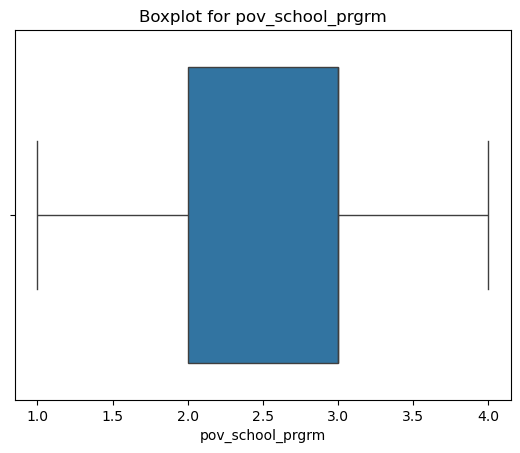

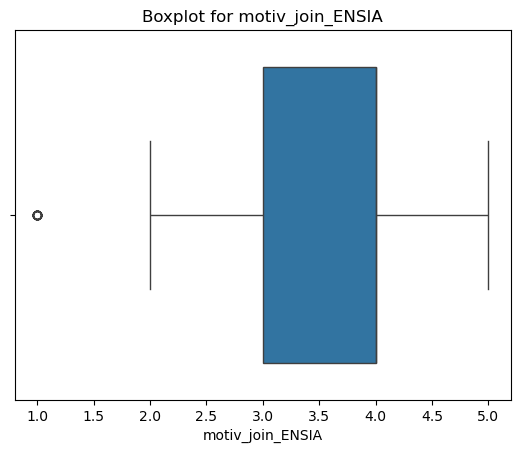

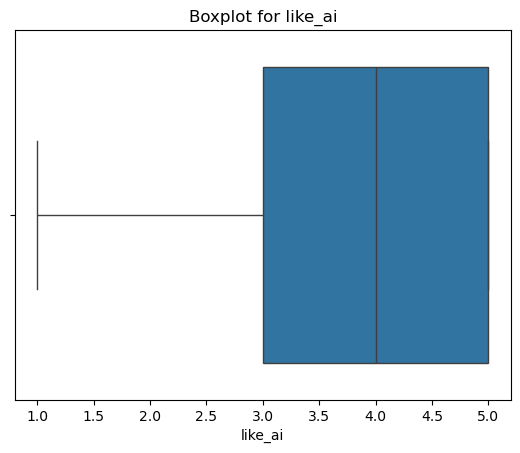

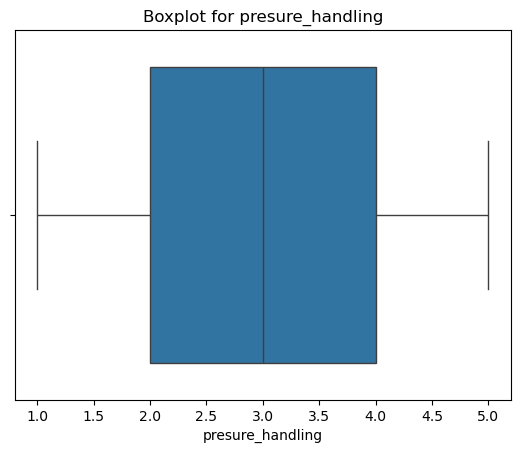

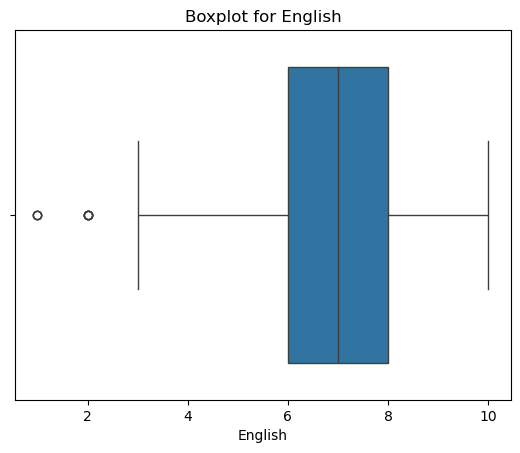

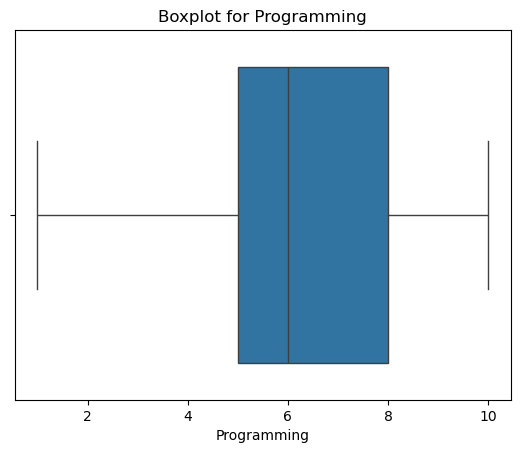

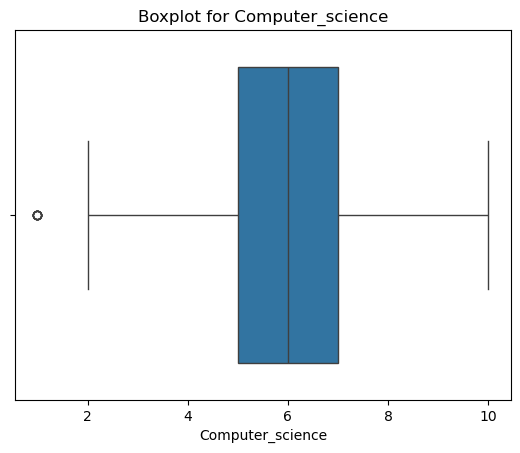

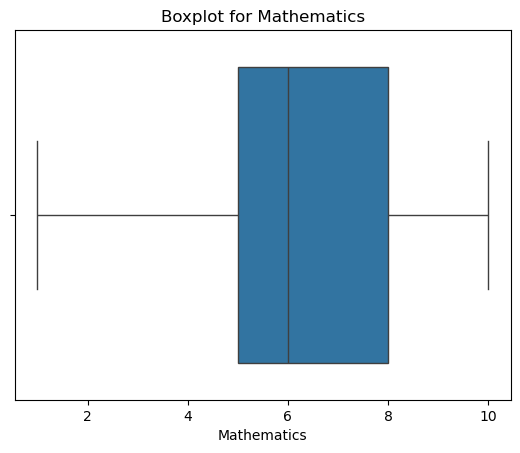

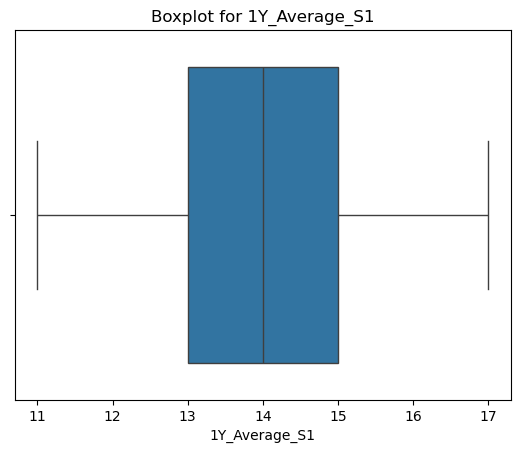

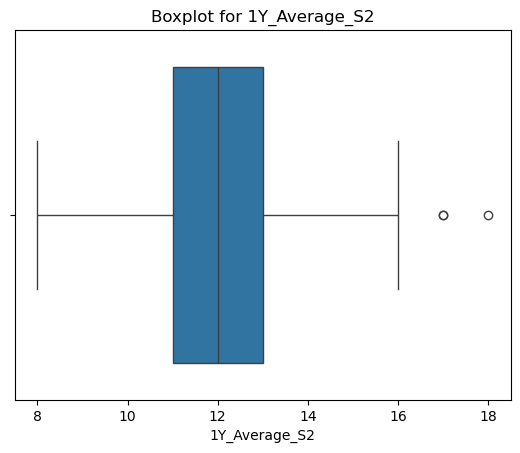

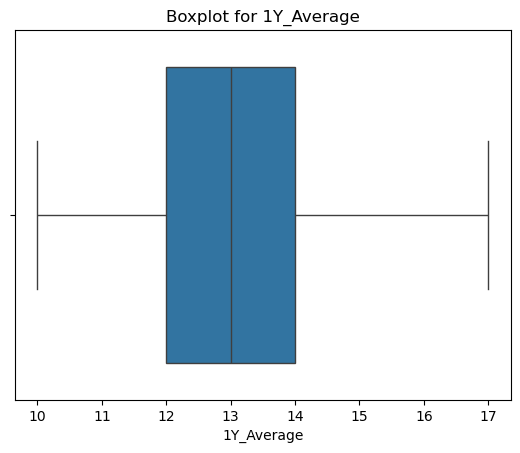

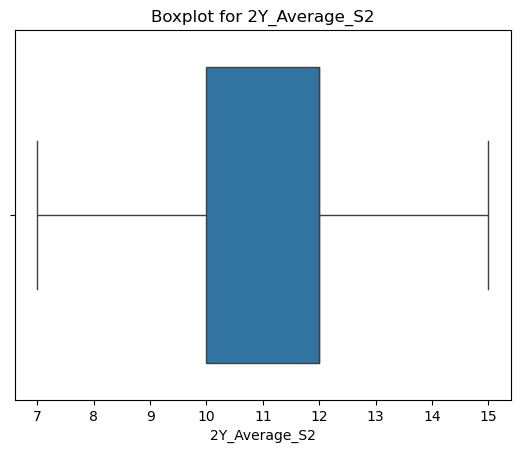

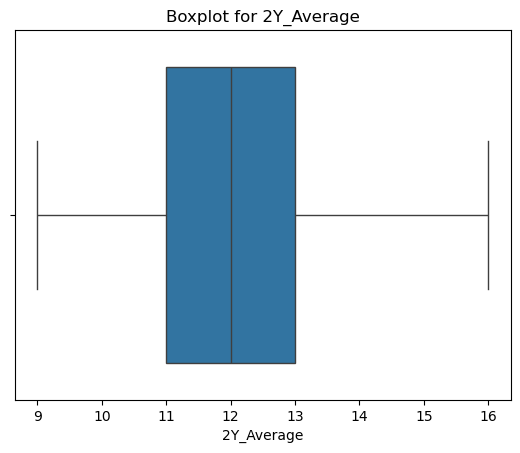

In [18]:

ensia_df.columns = ensia_df.columns.str.replace('[^\w\s]', '').str.replace(' ', '_')

numeric_columns = ensia_df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    sns.boxplot(x=ensia_df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


Remove outliers


In [19]:
# You can choose a method to remove outliers, for example, using IQR
Q1 = ensia_df[numeric_columns].quantile(0.25)
Q3 = ensia_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers using IQR method
ensia_df_no_outliers = ensia_df[~((ensia_df[numeric_columns] < (Q1 - 1.5 * IQR)) | (ensia_df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


# Visualization

Correlation Matrix

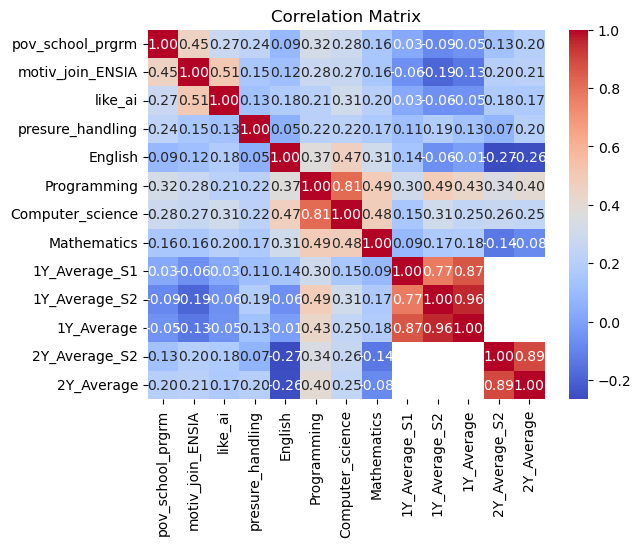

In [20]:
# Calculate and visualize the correlation matrix
numeric_columns = ensia_df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = ensia_df[numeric_columns]
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


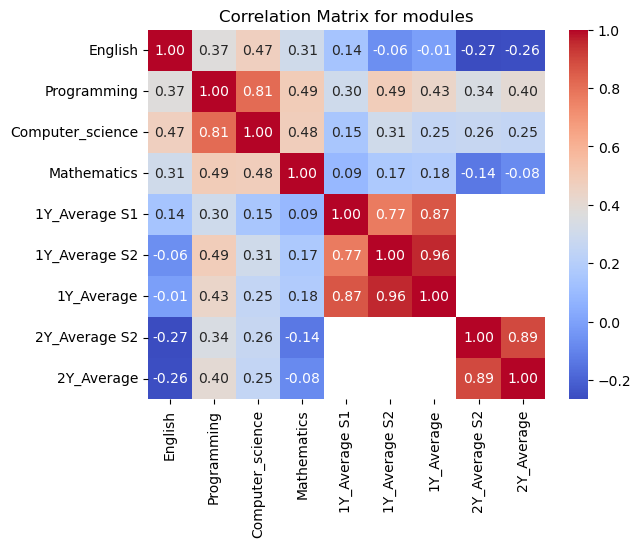

In [21]:
numeric_columns = modules.select_dtypes(include=['float64', 'int64']).columns
numeric_df = modules[numeric_columns]
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for modules')
plt.show()

Pairplot

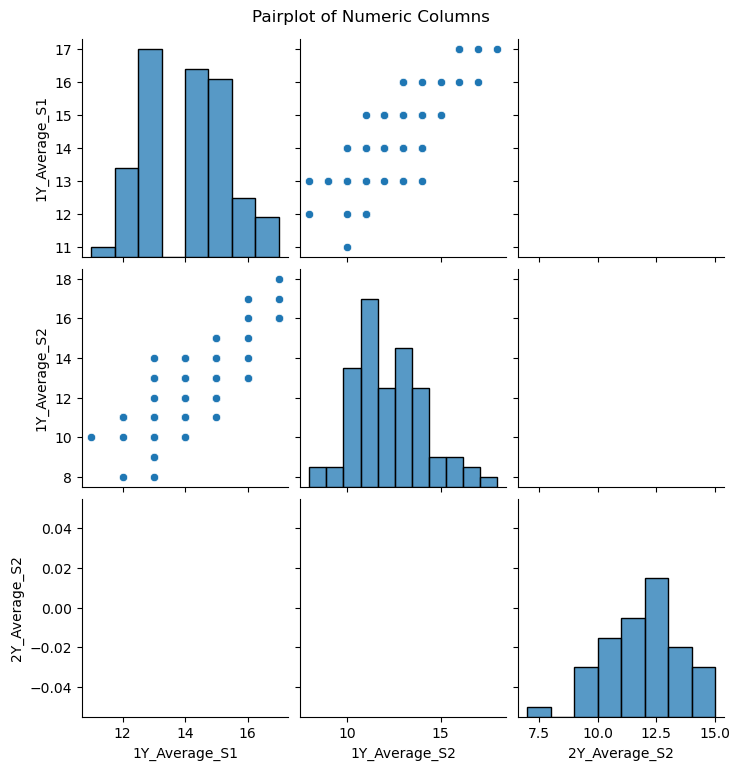

In [22]:
numeric_columns = ensia_df.select_dtypes(include=['float64', 'int64']).columns

# Replace spaces with underscores in column names
pairplot_columns = ['1Y_Average_S1', '1Y_Average_S2', '2Y_Average_S2']

sns.pairplot(ensia_df[pairplot_columns])
plt.suptitle('Pairplot of Numeric Columns', y=1.02)
plt.show()


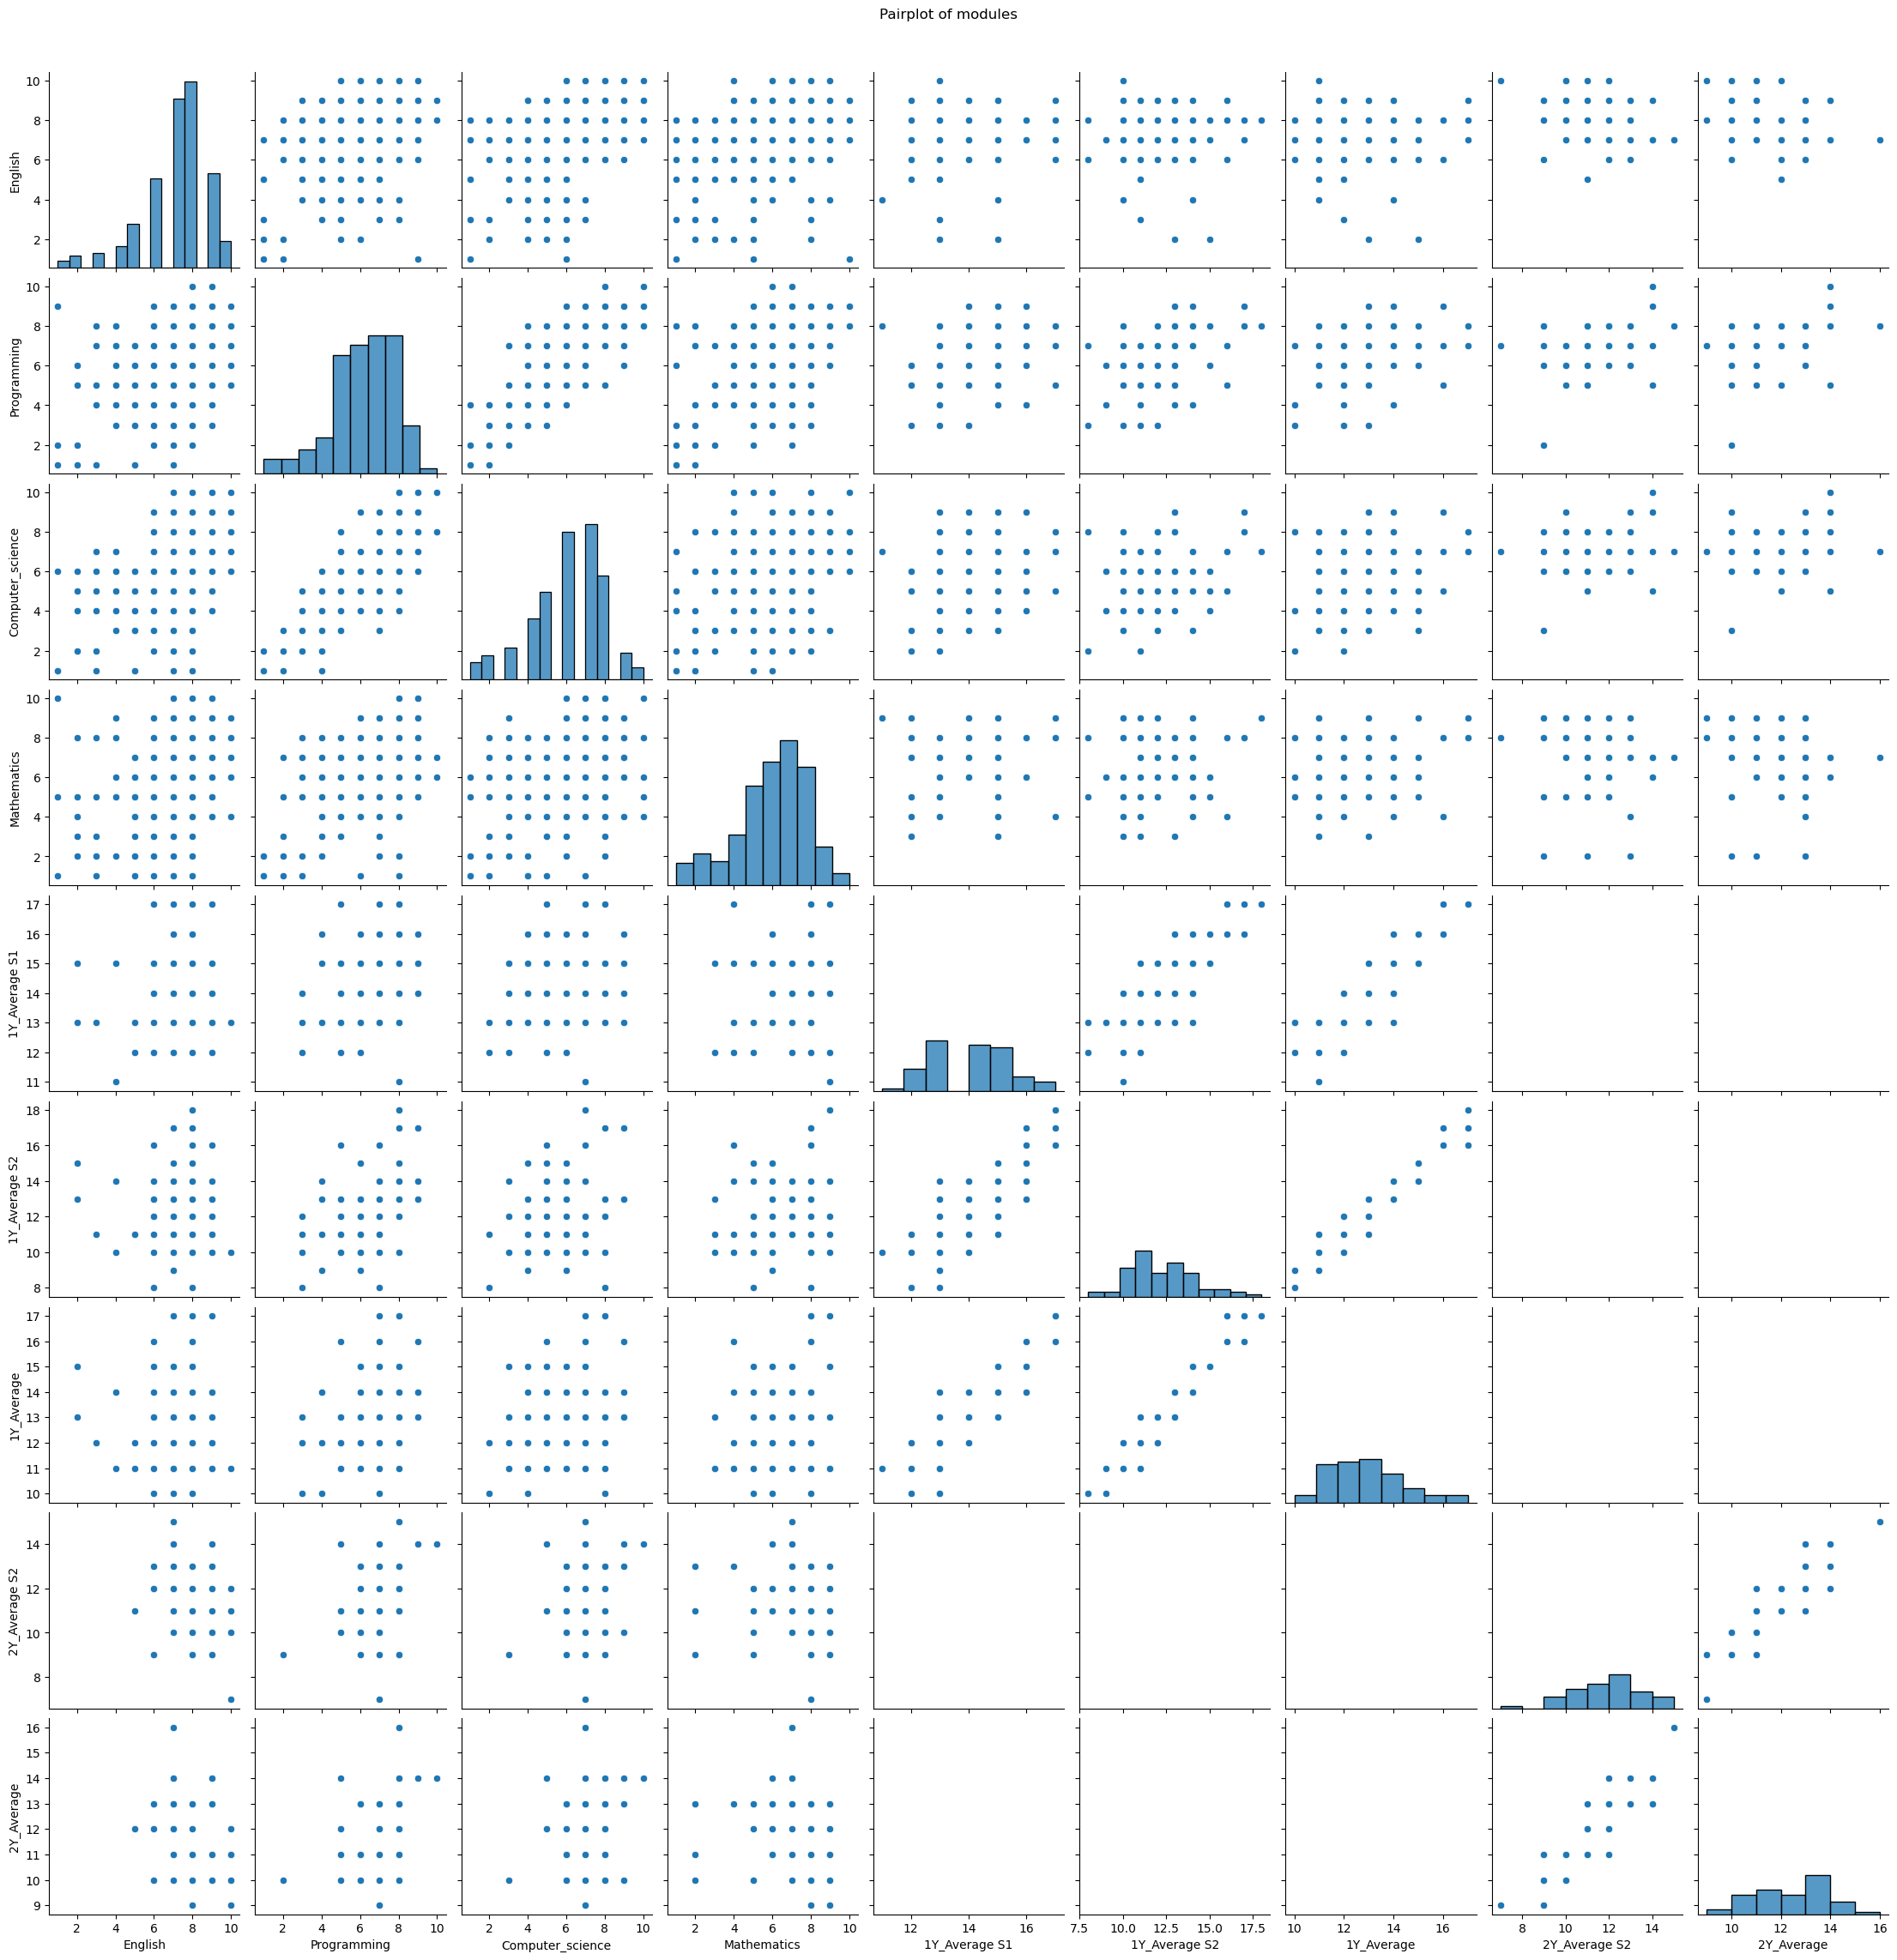

In [23]:
sns.pairplot(modules)
plt.suptitle('Pairplot of modules', y=1.02)
plt.show()

Distribution Plot

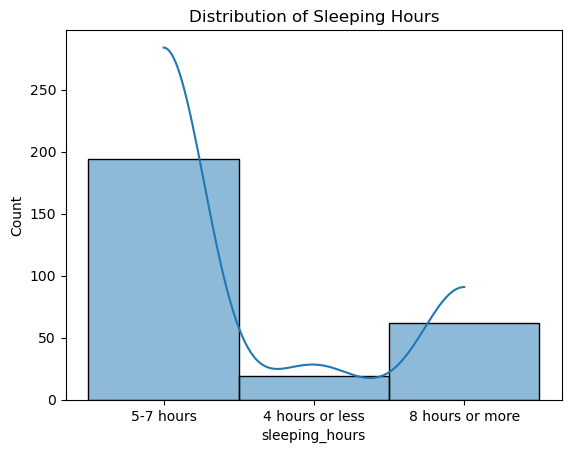

In [24]:
# Visualize the distribution of a numeric column
try:
    sns.histplot(ensia_df['sleeping_hours'], bins=["4 hours or less","5-7 hours","8 hours or more"], kde=True, discrete=True )
    plt.title('Distribution of Sleeping Hours')
    plt.show()
except KeyError as e:
    print(f"KeyError: {e}")


# Categorical Data Visualization

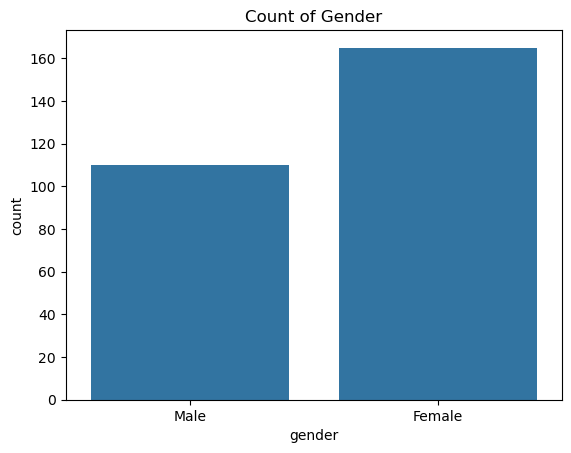

In [25]:
# Visualize the count of each category in a categorical column
sns.countplot(x='gender', data=ensia_df)
plt.title('Count of Gender')
plt.show()


Barplot for Categorical Data Comparison

# Relationships and Correlation

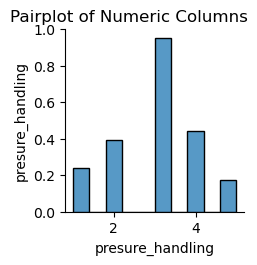

In [26]:
# Create a pairplot for numeric columns with scatter plots and histograms
sns.pairplot(ensia_df[['HpW_study', 'sleeping_hours', 'presure_handling']])
plt.suptitle('Pairplot of Numeric Columns', y=1.02)
plt.show()


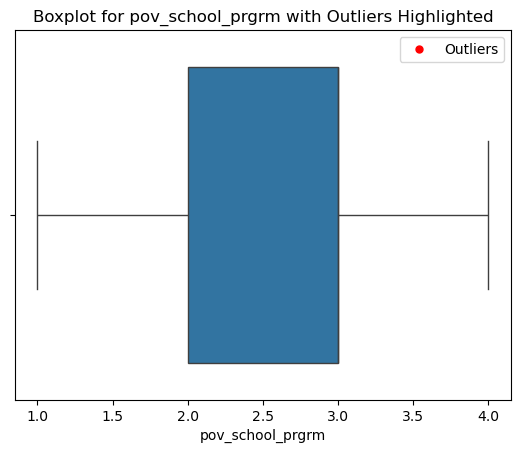

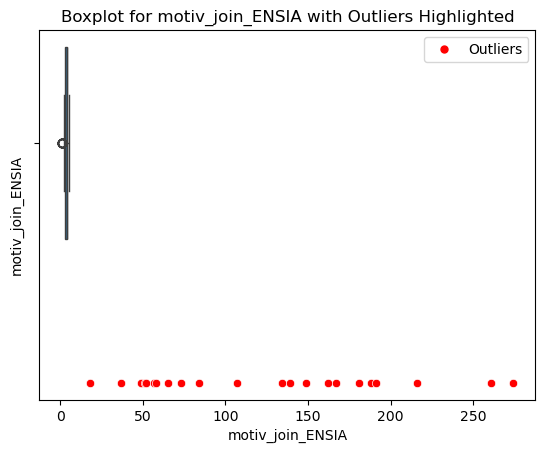

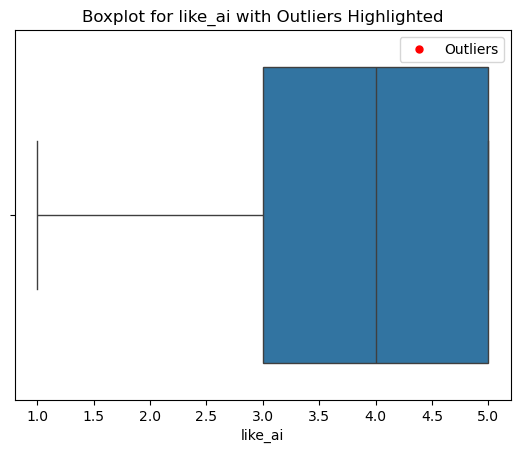

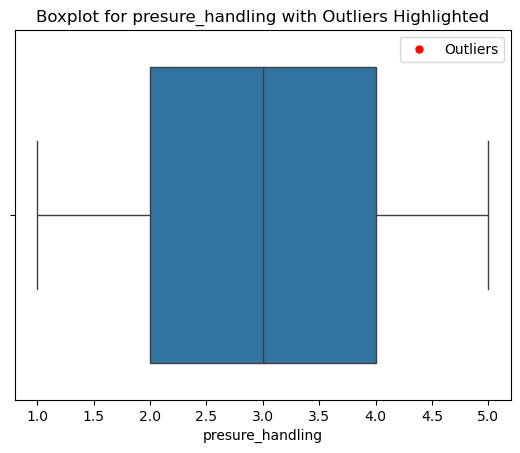

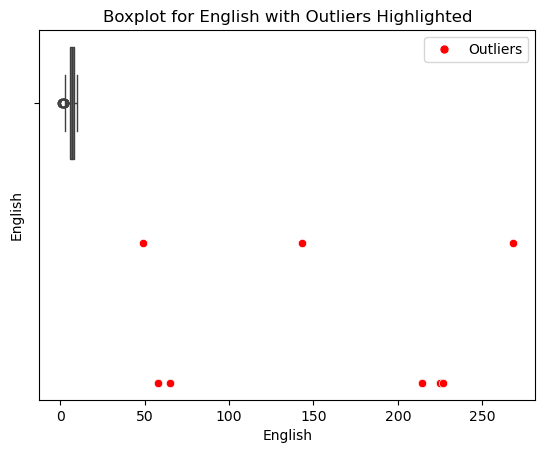

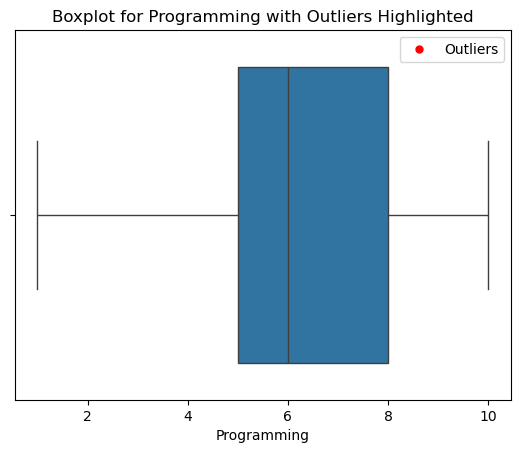

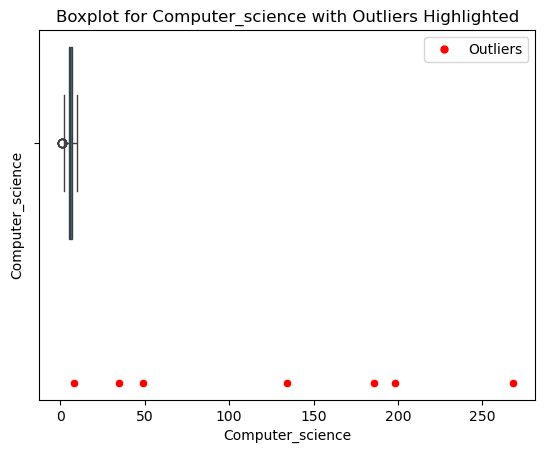

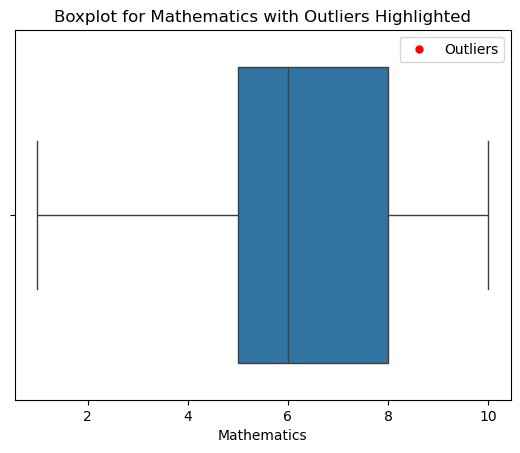

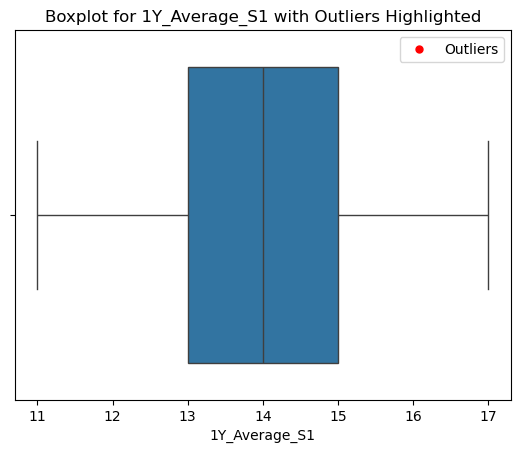

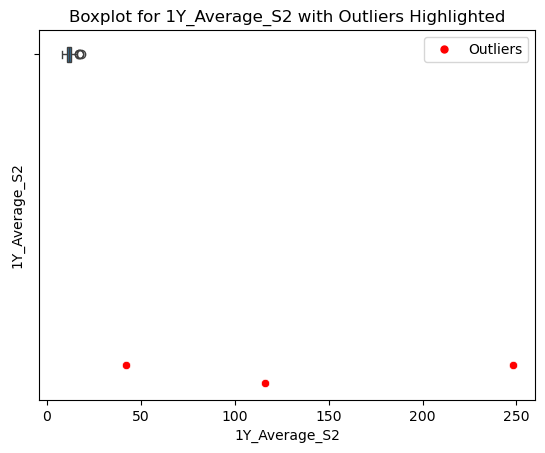

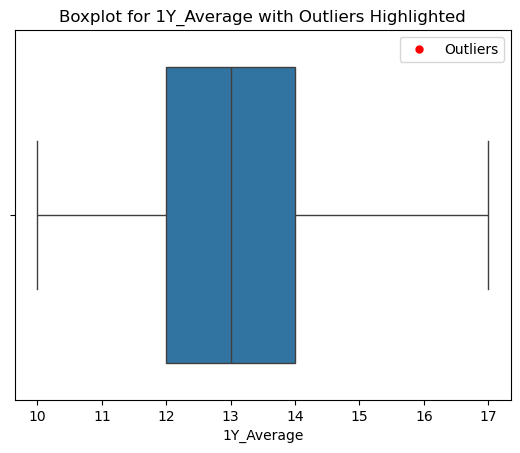

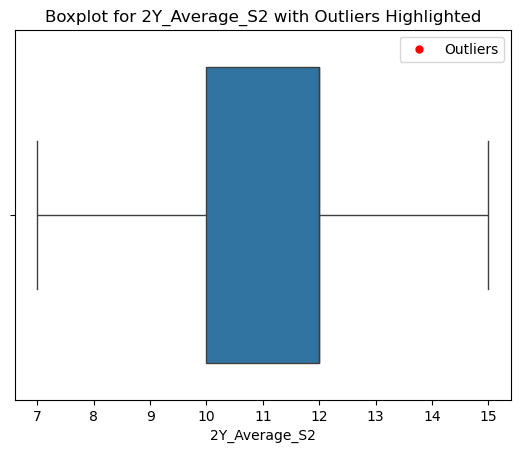

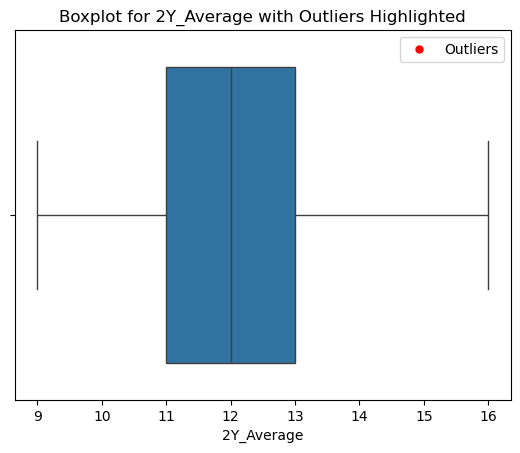

In [27]:
import matplotlib.lines as mlines

# Identify numeric columns in the DataFrame
numeric_columns = ensia_df.select_dtypes(include=['number']).columns

# Detect and display outliers for each numeric column
for column in numeric_columns:
    # Calculate IQR
    Q1 = ensia_df[column].quantile(0.25)
    Q3 = ensia_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = ensia_df[(ensia_df[column] < lower_bound) | (ensia_df[column] > upper_bound)]

    # Create a boxplot highlighting outliers
    sns.boxplot(x=ensia_df[column])
    scatter = sns.scatterplot(x=outliers.index, y=outliers[column], color='red', label='Outliers')

    # Create legend manually
    legend_labels = {'Outliers': scatter}
    plt.legend(handles=[mlines.Line2D([0], [0], color='red', marker='o', linestyle='None', markersize=5, label='Outliers')])

    plt.title(f'Boxplot for {column} with Outliers Highlighted')
    plt.show()


In [28]:
ensia_df

,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,learning_meth,recources,use_planner?,1st_obstcl,...,2Y_Average_S1,2Y_Intro_AI,2Y_Oper._res,2Y_Archi_II,2Y_Oper._Syst,2Y_Soft._Eng.,2Y_Web_Prog.,2Y_Intro._Busin.,2Y_Average_S2,2Y_Average
0,Male,First year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents, YouTube vi...",No,Pressure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,Third year,Mathematics,10-17,In your room (dorms),In peer,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents",No,Teachers' teaching method,...,High,Moderate,Moderate,Moderate,High,High,High,High,12.0,13.0
2,Male,First year,Science,18-25,In your room (dorms),Alone,Lectures,Online documents,Yes,Private life problems,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,Third year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, YouTube videos",No,Bad quality of internet,...,High,Moderate,High,High,High,High,High,High,12.0,13.0
4,Female,Third year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Mind mapping...","Books, Online documents, YouTube videos",No,Teachers' teaching method,...,High,Low,Moderate,High,Moderate,High,Moderate,High,10.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Female,Second year,Mathematics,26-33,At home,Alone,"Lectures, Online courses and tutorials","Books, YouTube videos",No,Pressure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,Male,First year,Mathematics,18-25,In your room (dorms),With a group,"Learning by practicing, Online courses and tut...","Books, Online tutorials, Online documents, You...",No,Lack of time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,Male,First year,Mathematics,18-25,In your room (dorms),Alone,Lectures,Online documents,No,Bad quality of internet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Male,First year,Mathematics,18-25,In your room (dorms),In peer,"Learning by practicing, Online courses and tut...","Online documents, YouTube videos",No,Lack of time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


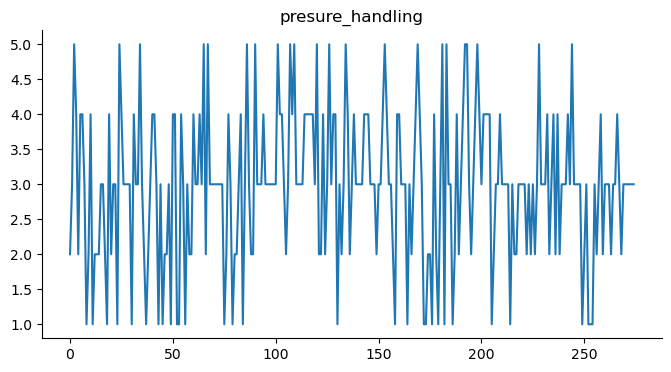

In [29]:

ensia_df['presure_handling'].plot(kind='line', figsize=(8, 4), title='presure_handling')
plt.gca().spines[['top', 'right']].set_visible(False)

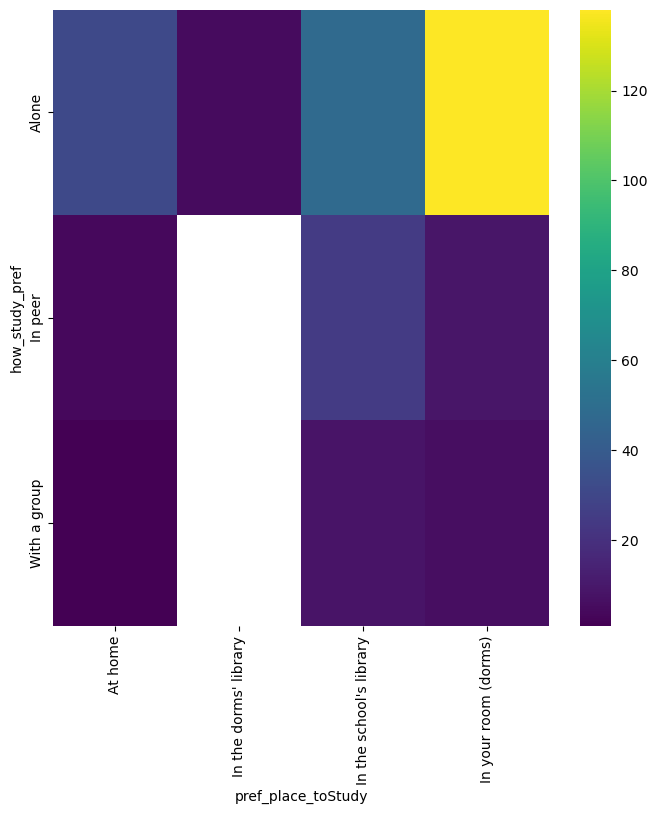

In [30]:

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['how_study_pref'].value_counts()
    for x_label, grp in ensia_df.groupby('pref_place_toStudy')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('pref_place_toStudy')
_ = plt.ylabel('how_study_pref')

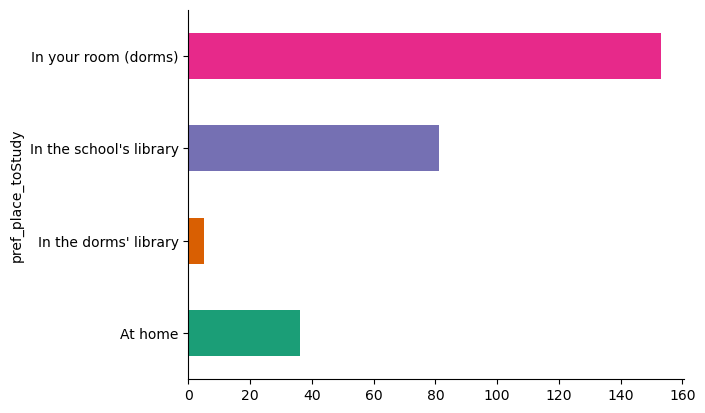

In [31]:


ensia_df.groupby('pref_place_toStudy').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

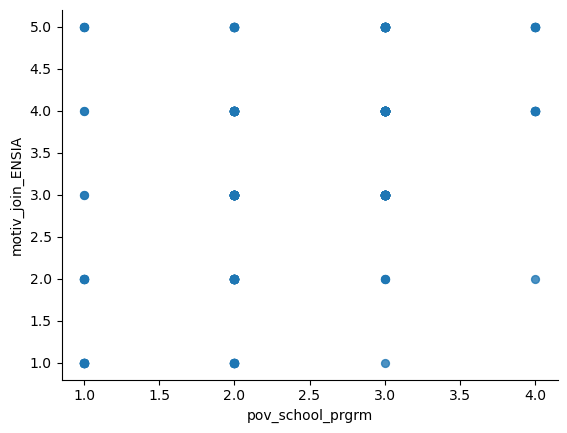

In [32]:

ensia_df.plot(kind='scatter', x='pov_school_prgrm', y='motiv_join_ENSIA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

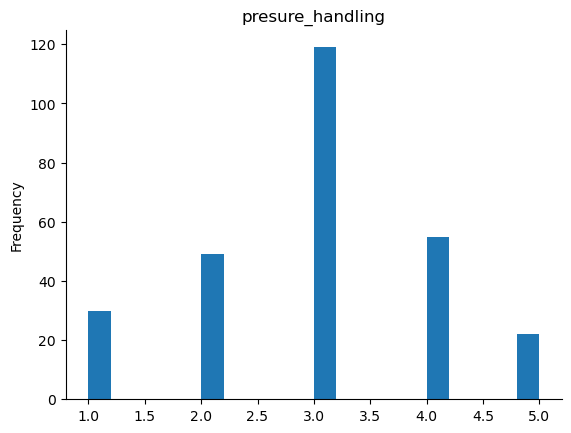

In [33]:

ensia_df['presure_handling'].plot(kind='hist', bins=20, title='presure_handling')
plt.gca().spines[['top', 'right',]].set_visible(False)

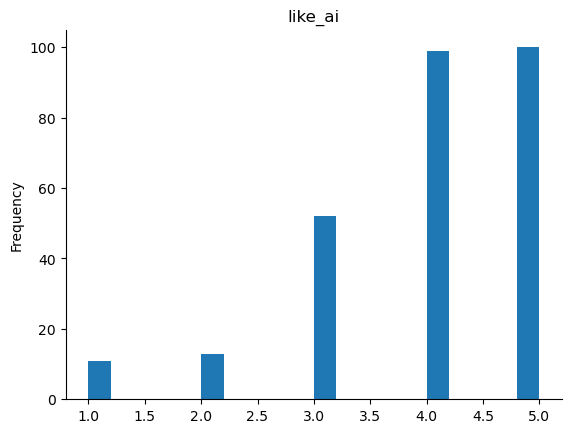

In [34]:

ensia_df['like_ai'].plot(kind='hist', bins=20, title='like_ai')
plt.gca().spines[['top', 'right',]].set_visible(False)

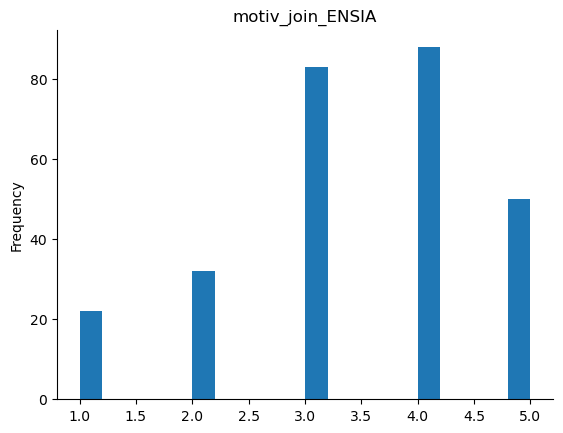

In [35]:

ensia_df['motiv_join_ENSIA'].plot(kind='hist', bins=20, title='motiv_join_ENSIA')
plt.gca().spines[['top', 'right',]].set_visible(False)

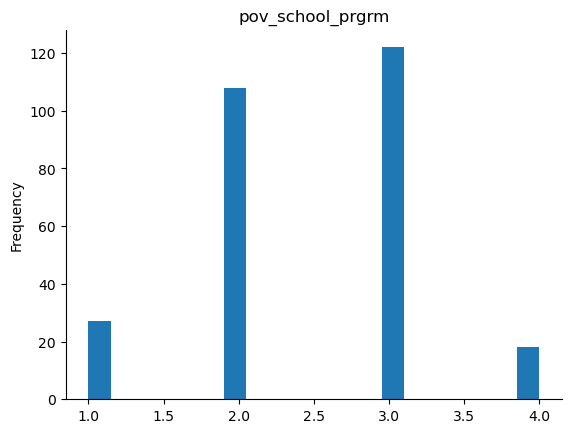

In [36]:

ensia_df['pov_school_prgrm'].plot(kind='hist', bins=20, title='pov_school_prgrm')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Feature Engineering


Combining Obstacles

Interaction Features

In [37]:
ensia_df

,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,learning_meth,recources,use_planner?,1st_obstcl,...,2Y_Average_S1,2Y_Intro_AI,2Y_Oper._res,2Y_Archi_II,2Y_Oper._Syst,2Y_Soft._Eng.,2Y_Web_Prog.,2Y_Intro._Busin.,2Y_Average_S2,2Y_Average
0,Male,First year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents, YouTube vi...",No,Pressure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,Third year,Mathematics,10-17,In your room (dorms),In peer,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents",No,Teachers' teaching method,...,High,Moderate,Moderate,Moderate,High,High,High,High,12.0,13.0
2,Male,First year,Science,18-25,In your room (dorms),Alone,Lectures,Online documents,Yes,Private life problems,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,Third year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, YouTube videos",No,Bad quality of internet,...,High,Moderate,High,High,High,High,High,High,12.0,13.0
4,Female,Third year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Mind mapping...","Books, Online documents, YouTube videos",No,Teachers' teaching method,...,High,Low,Moderate,High,Moderate,High,Moderate,High,10.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Female,Second year,Mathematics,26-33,At home,Alone,"Lectures, Online courses and tutorials","Books, YouTube videos",No,Pressure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,Male,First year,Mathematics,18-25,In your room (dorms),With a group,"Learning by practicing, Online courses and tut...","Books, Online tutorials, Online documents, You...",No,Lack of time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,Male,First year,Mathematics,18-25,In your room (dorms),Alone,Lectures,Online documents,No,Bad quality of internet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Male,First year,Mathematics,18-25,In your room (dorms),In peer,"Learning by practicing, Online courses and tut...","Online documents, YouTube videos",No,Lack of time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Droping Modules columns


In [38]:
# List of average columns to keep
average_columns = ['1Y_Average', '2Y_Average']

# Create a new DataFrame to store the result
ensia_df_filtered = ensia_df.copy()

# Drop columns containing module names from ensia_df_filtered
columns_to_drop = [col for col in ensia_df_filtered.columns if '1Y_' in col or '2Y_' in col]
ensia_df_filtered = ensia_df_filtered.drop(columns=columns_to_drop, errors='ignore')

# Keep only the specified average columns in ensia_df_filtered
ensia_df_filtered[average_columns] = ensia_df[average_columns]

# Display the resulting DataFrame
print(ensia_df_filtered)


     gender current_year    bac_serie HpW_study    pref_place_toStudy  \
0      Male   First year  Mathematics     18-25  In your room (dorms)   
1    Female   Third year  Mathematics     10-17  In your room (dorms)   
2      Male   First year      Science     18-25  In your room (dorms)   
3      Male   Third year  Mathematics     18-25  In your room (dorms)   
4    Female   Third year  Mathematics     18-25  In your room (dorms)   
..      ...          ...          ...       ...                   ...   
270  Female  Second year  Mathematics     26-33               At home   
271    Male   First year  Mathematics     18-25  In your room (dorms)   
272    Male   First year  Mathematics     18-25  In your room (dorms)   
273    Male   First year  Mathematics     18-25  In your room (dorms)   
274    Male   First year      Science     34-41  In your room (dorms)   

    how_study_pref                                      learning_meth  \
0            Alone  Lectures, Learning by practici

In [39]:
ensia_df_filtered.columns

Index(['gender', 'current_year', 'bac_serie', 'HpW_study',
       'pref_place_toStudy', 'how_study_pref', 'learning_meth', 'recources',
       'use_planner?', '1st_obstcl', '2nd_obstcl', '3rd_obstcl', '4th_obstcl',
       '5th_obstcl', '6th_obstcl', '7th_obstcl', '8th_obstcl',
       'pov_school_prgrm', 'external_act', 'motiv_join_ENSIA', 'like_ai',
       'infl_oth_feedback', 'sleeping_hours', 'presure_handling', 'English',
       'Programming', 'Computer_science', 'Mathematics', '1Y_Average',
       '2Y_Average'],
      dtype='object')

In [40]:
# Assuming your DataFrame is named 'data'
for column in ensia_df_filtered.columns:
    try:
        # Try to convert the column to numeric
        ensia_df_filtered[column] = pd.to_numeric(ensia_df_filtered[column])
    except ValueError as e:
        # If the conversion fails, leave the column as is and print a message
        print(f"Column '{column}' could not be converted to numeric. Error: {e}")


ensia_df_filtered.dtypes

Column 'gender' could not be converted to numeric. Error: Unable to parse string "Male" at position 0
Column 'current_year' could not be converted to numeric. Error: Unable to parse string "First year" at position 0
Column 'bac_serie' could not be converted to numeric. Error: Unable to parse string "Mathematics" at position 0
Column 'HpW_study' could not be converted to numeric. Error: Unable to parse string "18-25" at position 0
Column 'pref_place_toStudy' could not be converted to numeric. Error: Unable to parse string "In your room (dorms)" at position 0
Column 'how_study_pref' could not be converted to numeric. Error: Unable to parse string "Alone" at position 0
Column 'learning_meth' could not be converted to numeric. Error: Unable to parse string "Lectures, Learning by practicing, Project-based learning, Online courses and tutorials" at position 0
Column 'recources' could not be converted to numeric. Error: Unable to parse string "Online tutorials, Online documents, YouTube video

gender                 object
current_year           object
bac_serie              object
HpW_study              object
pref_place_toStudy     object
how_study_pref         object
learning_meth          object
recources              object
use_planner?           object
1st_obstcl             object
2nd_obstcl             object
3rd_obstcl             object
4th_obstcl             object
5th_obstcl             object
6th_obstcl             object
7th_obstcl             object
8th_obstcl             object
pov_school_prgrm        int64
external_act           object
motiv_join_ENSIA        int64
like_ai                 int64
infl_oth_feedback      object
sleeping_hours         object
presure_handling        int64
English                 int64
Programming             int64
Computer_science        int64
Mathematics             int64
1Y_Average            float64
2Y_Average            float64
dtype: object

In [41]:

ensia_df_filtered['performance_index'] = ensia_df_filtered[['1Y_Average', '2Y_Average']].sum(axis=1)
ensia_df_filtered.drop(columns=['1Y_Average', '2Y_Average'], inplace=True)



In [42]:
# Assuming your DataFrame is named 'ensia_df_filtered'
# Remove spaces at the extremities and convert to camel case in the 'learning_meth' column
ensia_df_filtered['learning_meth'] = ensia_df_filtered['learning_meth'].apply(lambda x: ','.join([val.strip() for val in x.split(',')]) if pd.notna(x) else '')
ensia_df_filtered['learning_meth'] = ensia_df_filtered['learning_meth'].str.title()

# Create a new column to store the unique values as lists
ensia_df_filtered['learning_methods_list'] = ensia_df_filtered['learning_meth'].apply(lambda x: list(set(x.split(','))) if pd.notna(x) else [])
ensia_df_filtered = ensia_df_filtered.drop(columns='learning_meth')
learning = ensia_df_filtered['learning_methods_list'].to_list
learning 

<bound method IndexOpsMixin.tolist of 0      [Project-Based Learning, Learning By Practicin...
1      [Project-Based Learning, Learning By Practicin...
2                                             [Lectures]
3      [Project-Based Learning, Learning By Practicin...
4      [Mind Mapping And Visualization, Learning By P...
                             ...                        
270             [Online Courses And Tutorials, Lectures]
271    [Learning By Practicing, Online Courses And Tu...
272                                           [Lectures]
273    [Learning By Practicing, Online Courses And Tu...
274    [Learning By Practicing, Online Courses And Tu...
Name: learning_methods_list, Length: 275, dtype: object>

In [43]:
from mlxtend.preprocessing import TransactionEncoder
learning_dataset = ensia_df_filtered['learning_methods_list'].tolist()
mlb = TransactionEncoder()
learning_binary = mlb.fit_transform(learning_dataset)
#### END CODE HERE ####
learning_dataset_onehot = pd.DataFrame(learning_binary, columns=mlb.columns_)
ensia_df_filtered = ensia_df_filtered.drop(columns='learning_methods_list')

In [44]:
ensia_df_filtered = ensia_df_filtered.join(learning_dataset_onehot)
ensia_df_filtered

,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,recources,use_planner?,1st_obstcl,2nd_obstcl,...,Programming,Computer_science,Mathematics,performance_index,Interactive Workshops,Learning By Practicing,Lectures,Mind Mapping And Visualization,Online Courses And Tutorials,Project-Based Learning
0,Male,First year,Mathematics,18-25,In your room (dorms),Alone,"Online tutorials, Online documents, YouTube vi...",No,Pressure,Private life problems,...,7,9,6,0.0,False,True,True,False,True,True
1,Female,Third year,Mathematics,10-17,In your room (dorms),In peer,"Online tutorials, Online documents",No,Teachers' teaching method,Lack of time,...,8,8,9,13.0,False,True,True,False,False,True
2,Male,First year,Science,18-25,In your room (dorms),Alone,Online documents,Yes,Private life problems,Lack of time,...,5,7,6,0.0,False,False,True,False,False,False
3,Male,Third year,Mathematics,18-25,In your room (dorms),Alone,"Online tutorials, YouTube videos",No,Bad quality of internet,Lack of previous knowledge or experience in th...,...,8,8,8,13.0,False,True,True,False,True,True
4,Female,Third year,Mathematics,18-25,In your room (dorms),Alone,"Books, Online documents, YouTube videos",No,Teachers' teaching method,Lack of previous knowledge or experience in th...,...,7,6,9,11.0,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Female,Second year,Mathematics,26-33,At home,Alone,"Books, YouTube videos",No,Pressure,Lack of time,...,8,8,8,14.0,False,False,True,False,True,False
271,Male,First year,Mathematics,18-25,In your room (dorms),With a group,"Books, Online tutorials, Online documents, You...",No,Lack of time,Bad quality of internet,...,2,2,7,0.0,False,True,False,False,True,False
272,Male,First year,Mathematics,18-25,In your room (dorms),Alone,Online documents,No,Bad quality of internet,Lack of time,...,9,8,9,0.0,False,False,True,False,False,False
273,Male,First year,Mathematics,18-25,In your room (dorms),In peer,"Online documents, YouTube videos",No,Lack of time,Pressure,...,5,8,5,0.0,False,True,False,False,True,False


In [45]:

# Assuming your DataFrame is named 'ensia_df_filtered'
# Remove spaces at the extremities and convert to camel case in the 'learning_meth' column
ensia_df_filtered['recources'] = ensia_df_filtered['recources'].apply(lambda x: ','.join([val.strip() for val in x.split(',')]) if pd.notna(x) else '')
ensia_df_filtered['recources'] = ensia_df_filtered['recources'].str.title()

# Create a new column to store the unique values as lists
ensia_df_filtered['resources_list'] = ensia_df_filtered['recources'].apply(lambda x: list(set(x.split(','))) if pd.notna(x) else [])
ensia_df_filtered = ensia_df_filtered.drop(columns='recources')
resources = ensia_df_filtered['resources_list'].to_list
resources 

<bound method IndexOpsMixin.tolist of 0      [Private Courses, Youtube Videos, Online Docum...
1                   [Online Documents, Online Tutorials]
2                                     [Online Documents]
3                     [Youtube Videos, Online Tutorials]
4              [Youtube Videos, Online Documents, Books]
                             ...                        
270                              [Youtube Videos, Books]
271    [Youtube Videos, Online Documents, Online Tuto...
272                                   [Online Documents]
273                   [Youtube Videos, Online Documents]
274    [Youtube Videos, Online Documents, Online Tuto...
Name: resources_list, Length: 275, dtype: object>

In [46]:
from mlxtend.preprocessing import TransactionEncoder
resources_dataset = ensia_df_filtered['resources_list'].tolist()
mlb = TransactionEncoder()
resources_binary = mlb.fit_transform(resources_dataset)
#### END CODE HERE ####
resources_dataset_onehot = pd.DataFrame(resources_binary, columns=mlb.columns_)
ensia_df_filtered = ensia_df_filtered.drop(columns='resources_list')
ensia_df_filtered


,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,use_planner?,1st_obstcl,2nd_obstcl,3rd_obstcl,...,Programming,Computer_science,Mathematics,performance_index,Interactive Workshops,Learning By Practicing,Lectures,Mind Mapping And Visualization,Online Courses And Tutorials,Project-Based Learning
0,Male,First year,Mathematics,18-25,In your room (dorms),Alone,No,Pressure,Private life problems,Lack of time,...,7,9,6,0.0,False,True,True,False,True,True
1,Female,Third year,Mathematics,10-17,In your room (dorms),In peer,No,Teachers' teaching method,Lack of time,Lack of previous knowledge or experience in th...,...,8,8,9,13.0,False,True,True,False,False,True
2,Male,First year,Science,18-25,In your room (dorms),Alone,Yes,Private life problems,Lack of time,Bad quality of internet,...,5,7,6,0.0,False,False,True,False,False,False
3,Male,Third year,Mathematics,18-25,In your room (dorms),Alone,No,Bad quality of internet,Lack of previous knowledge or experience in th...,Teachers' teaching method,...,8,8,8,13.0,False,True,True,False,True,True
4,Female,Third year,Mathematics,18-25,In your room (dorms),Alone,No,Teachers' teaching method,Lack of previous knowledge or experience in th...,Pressure,...,7,6,9,11.0,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Female,Second year,Mathematics,26-33,At home,Alone,No,Pressure,Lack of time,Teachers' teaching method,...,8,8,8,14.0,False,False,True,False,True,False
271,Male,First year,Mathematics,18-25,In your room (dorms),With a group,No,Lack of time,Bad quality of internet,Pressure,...,2,2,7,0.0,False,True,False,False,True,False
272,Male,First year,Mathematics,18-25,In your room (dorms),Alone,No,Bad quality of internet,Lack of time,Pressure,...,9,8,9,0.0,False,False,True,False,False,False
273,Male,First year,Mathematics,18-25,In your room (dorms),In peer,No,Lack of time,Pressure,Teachers' teaching method,...,5,8,5,0.0,False,True,False,False,True,False


In [47]:
resources_dataset_onehot
ensia_df_filtered = pd.concat([ensia_df_filtered,resources_dataset_onehot], axis=1)
ensia_df_filtered 

,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,use_planner?,1st_obstcl,2nd_obstcl,3rd_obstcl,...,Mentors,Online Documents,Online Tutorials,Other Schools' Worksheets,Other Universities Courses,Pdf Course,Private Courses,The Indian Guy On Youtube ??,Worksheets,Youtube Videos
0,Male,First year,Mathematics,18-25,In your room (dorms),Alone,No,Pressure,Private life problems,Lack of time,...,False,True,True,False,False,False,True,False,False,True
1,Female,Third year,Mathematics,10-17,In your room (dorms),In peer,No,Teachers' teaching method,Lack of time,Lack of previous knowledge or experience in th...,...,False,True,True,False,False,False,False,False,False,False
2,Male,First year,Science,18-25,In your room (dorms),Alone,Yes,Private life problems,Lack of time,Bad quality of internet,...,False,True,False,False,False,False,False,False,False,False
3,Male,Third year,Mathematics,18-25,In your room (dorms),Alone,No,Bad quality of internet,Lack of previous knowledge or experience in th...,Teachers' teaching method,...,False,False,True,False,False,False,False,False,False,True
4,Female,Third year,Mathematics,18-25,In your room (dorms),Alone,No,Teachers' teaching method,Lack of previous knowledge or experience in th...,Pressure,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Female,Second year,Mathematics,26-33,At home,Alone,No,Pressure,Lack of time,Teachers' teaching method,...,False,False,False,False,False,False,False,False,False,True
271,Male,First year,Mathematics,18-25,In your room (dorms),With a group,No,Lack of time,Bad quality of internet,Pressure,...,False,True,True,False,False,False,False,False,False,True
272,Male,First year,Mathematics,18-25,In your room (dorms),Alone,No,Bad quality of internet,Lack of time,Pressure,...,False,True,False,False,False,False,False,False,False,False
273,Male,First year,Mathematics,18-25,In your room (dorms),In peer,No,Lack of time,Pressure,Teachers' teaching method,...,False,True,False,False,False,False,False,False,False,True


In [48]:
ensia_df_filtered = pd.DataFrame(ensia_df_filtered)

In [49]:
import pandas as pd

for columnName in ensia_df_filtered.columns:
    if columnName != 'performance_index':
        if pd.api.types.is_categorical_dtype(ensia_df_filtered[columnName]):
            ensia_df_filtered[columnName] = ensia_df_filtered[columnName].cat.codes
        else:
            ensia_df_filtered[columnName] = pd.Categorical(ensia_df_filtered[columnName]).codes


/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_86124/633549897.py:5: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(ensia_df_filtered[columnName]):
/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_86124/633549897.py:5: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(ensia_df_filtered[columnName]):
/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_86124/633549897.py:5: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(ensia_df_filtered[columnName]):
/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_86124/633549897.py:5: DeprecationWarning: is

In [50]:
ensia_df_filtered

,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,use_planner?,1st_obstcl,2nd_obstcl,3rd_obstcl,...,Mentors,Online Documents,Online Tutorials,Other Schools' Worksheets,Other Universities Courses,Pdf Course,Private Courses,The Indian Guy On Youtube ??,Worksheets,Youtube Videos
0,1,0,0,1,3,0,0,4,5,2,...,0,1,1,0,0,0,1,0,0,1
1,0,2,0,0,3,1,0,6,2,1,...,0,1,1,0,0,0,0,0,0,0
2,1,0,1,1,3,0,1,5,2,0,...,0,1,0,0,0,0,0,0,0,0
3,1,2,0,1,3,0,0,0,1,6,...,0,0,1,0,0,0,0,0,0,1
4,0,2,0,1,3,0,0,6,1,4,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0,1,0,2,0,0,0,4,2,6,...,0,0,0,0,0,0,0,0,0,1
271,1,0,0,1,3,2,0,2,0,4,...,0,1,1,0,0,0,0,0,0,1
272,1,0,0,1,3,0,0,0,2,4,...,0,1,0,0,0,0,0,0,0,0
273,1,0,0,1,3,1,0,2,4,6,...,0,1,0,0,0,0,0,0,0,1


In [51]:
ensia_df_filtered[ensia_df_filtered['performance_index']!=0]

,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,use_planner?,1st_obstcl,2nd_obstcl,3rd_obstcl,...,Mentors,Online Documents,Online Tutorials,Other Schools' Worksheets,Other Universities Courses,Pdf Course,Private Courses,The Indian Guy On Youtube ??,Worksheets,Youtube Videos
1,0,2,0,0,3,1,0,6,2,1,...,0,1,1,0,0,0,0,0,0,0
3,1,2,0,1,3,0,0,0,1,6,...,0,0,1,0,0,0,0,0,0,1
4,0,2,0,1,3,0,0,6,1,4,...,0,1,0,0,0,0,0,0,0,1
5,0,1,0,1,0,0,1,1,4,2,...,0,1,0,0,0,0,0,0,0,1
9,0,1,0,1,3,0,0,7,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0,2,0,2,2,0,0,1,3,4,...,0,1,1,0,0,0,0,0,0,1
265,0,1,1,1,2,0,1,4,2,6,...,0,1,0,0,0,0,0,0,0,1
266,1,1,1,1,3,0,1,5,6,1,...,0,1,1,0,0,0,0,0,0,1
267,0,1,0,3,3,0,1,6,2,4,...,0,1,1,0,0,0,0,0,0,1


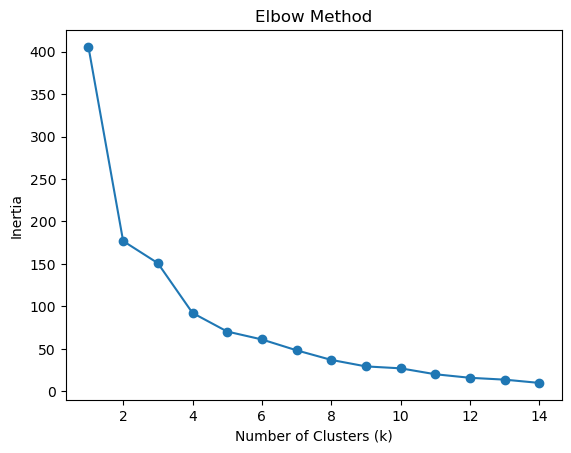

In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = ensia_df_filtered[ensia_df_filtered['performance_index']!=0]
X = X[['bac_serie','performance_index']]
# Initialize an empty list to store the inertia values
inertia = []

# Define the range of number of clusters to try
k_values = range(1, 15)

# Apply PCA transformation
# n_components = 2  # Specify the number of PCAs
# X = PCA(n_components=n_components).fit_transform(X)

# Apply K-means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [53]:
X  

,bac_serie,performance_index
1,0,13.0
3,0,13.0
4,0,11.0
5,0,11.0
9,0,12.0
...,...,...
263,0,10.0
265,1,11.0
266,1,13.0
267,0,12.0


/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_86124/3175987259.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


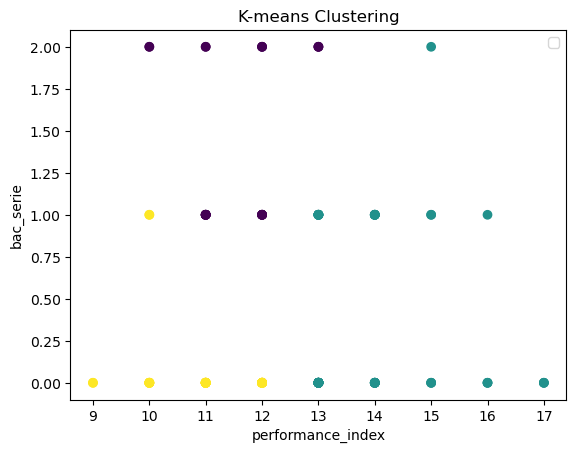

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = ensia_df_filtered[ensia_df_filtered['performance_index']!=0]
X = X[['bac_serie','performance_index']]
# Assuming X_train_test is defined earlier
# Initialize the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Predict the cluster labels for each data point
clusters = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X['performance_index'], X['bac_serie'], c=clusters, cmap='viridis')
plt.xlabel('performance_index')
plt.ylabel('bac_serie')
plt.title('K-means Clustering')
plt.legend()
plt.show()


In [55]:
clusters

array([1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0,
       2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 0, 2,
       1, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 0,
       2, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 2, 2, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 1], dtype=int32)

In [56]:
x=ensia_df_filtered[ensia_df_filtered['performance_index']!=0]
x['clusters']=clusters

/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_86124/58698340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['clusters']=clusters


In [57]:
x

,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,use_planner?,1st_obstcl,2nd_obstcl,3rd_obstcl,...,Online Documents,Online Tutorials,Other Schools' Worksheets,Other Universities Courses,Pdf Course,Private Courses,The Indian Guy On Youtube ??,Worksheets,Youtube Videos,clusters
1,0,2,0,0,3,1,0,6,2,1,...,1,1,0,0,0,0,0,0,0,1
3,1,2,0,1,3,0,0,0,1,6,...,0,1,0,0,0,0,0,0,1,1
4,0,2,0,1,3,0,0,6,1,4,...,1,0,0,0,0,0,0,0,1,2
5,0,1,0,1,0,0,1,1,4,2,...,1,0,0,0,0,0,0,0,1,2
9,0,1,0,1,3,0,0,7,1,0,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0,2,0,2,2,0,0,1,3,4,...,1,1,0,0,0,0,0,0,1,2
265,0,1,1,1,2,0,1,4,2,6,...,1,0,0,0,0,0,0,0,1,0
266,1,1,1,1,3,0,1,5,6,1,...,1,1,0,0,0,0,0,0,1,1
267,0,1,0,3,3,0,1,6,2,4,...,1,1,0,0,0,0,0,0,1,2


In [58]:
mean_performance_index = x.groupby('clusters')['performance_index'].mean()
min_performance_index = x.groupby('clusters')['performance_index'].min()
max_performance_index = x.groupby('clusters')['performance_index'].max()

print(f'min_performance_index {min_performance_index}  mean_performance_index{mean_performance_index} "-" max_performance_index{max_performance_index}')

min_performance_index clusters
0    10.0
1    13.0
2     9.0
Name: performance_index, dtype: float64  mean_performance_indexclusters
0    11.541667
1    13.868852
2    11.069767
Name: performance_index, dtype: float64 "-" max_performance_indexclusters
0    13.0
1    17.0
2    12.0
Name: performance_index, dtype: float64


/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_86124/606793316.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


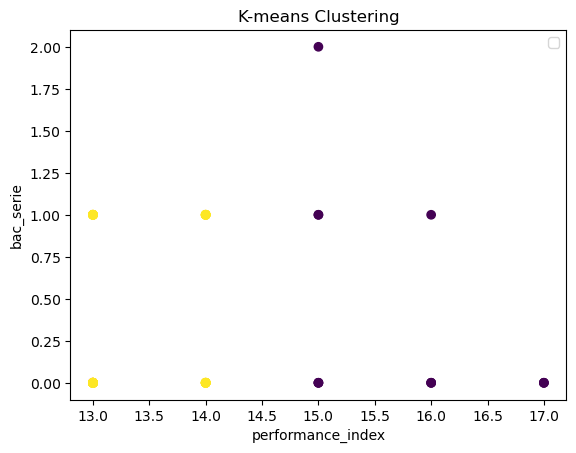

In [59]:
y=x[x['clusters']==1]
y = y[['bac_serie','performance_index']]
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the data
kmeans.fit(y)

# Predict the cluster labels for each data point
cll = kmeans.predict(y)

# Visualize the clusters
plt.scatter(y['performance_index'], y['bac_serie'], c=cll, cmap='viridis')
plt.xlabel('performance_index')
plt.ylabel('bac_serie')
plt.title('K-means Clustering')
plt.legend()
plt.show()


In [60]:
cll

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int32)

In [61]:
x

,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,use_planner?,1st_obstcl,2nd_obstcl,3rd_obstcl,...,Online Documents,Online Tutorials,Other Schools' Worksheets,Other Universities Courses,Pdf Course,Private Courses,The Indian Guy On Youtube ??,Worksheets,Youtube Videos,clusters
1,0,2,0,0,3,1,0,6,2,1,...,1,1,0,0,0,0,0,0,0,1
3,1,2,0,1,3,0,0,0,1,6,...,0,1,0,0,0,0,0,0,1,1
4,0,2,0,1,3,0,0,6,1,4,...,1,0,0,0,0,0,0,0,1,2
5,0,1,0,1,0,0,1,1,4,2,...,1,0,0,0,0,0,0,0,1,2
9,0,1,0,1,3,0,0,7,1,0,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0,2,0,2,2,0,0,1,3,4,...,1,1,0,0,0,0,0,0,1,2
265,0,1,1,1,2,0,1,4,2,6,...,1,0,0,0,0,0,0,0,1,0
266,1,1,1,1,3,0,1,5,6,1,...,1,1,0,0,0,0,0,0,1,1
267,0,1,0,3,3,0,1,6,2,4,...,1,1,0,0,0,0,0,0,1,2


In [62]:
cll = np.where(cll == 0, 3, cll)
cll

array([1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1], dtype=int32)

In [63]:
y['clusters']=cll
y

,bac_serie,performance_index,clusters
1,0,13.0,1
3,0,13.0,1
19,0,14.0,1
20,0,13.0,1
27,1,13.0,1
...,...,...,...
252,0,14.0,1
255,1,13.0,1
259,0,13.0,1
266,1,13.0,1


In [64]:
mean_performance_index = y.groupby('clusters')['performance_index'].mean()
min_performance_index = y.groupby('clusters')['performance_index'].min()
max_performance_index = y.groupby('clusters')['performance_index'].max()

print(f'min_performance_index {min_performance_index}  mean_performance_index{mean_performance_index} "-" max_performance_index{max_performance_index}')

min_performance_index clusters
1    13.0
3    15.0
Name: performance_index, dtype: float64  mean_performance_indexclusters
1    13.354167
3    15.769231
Name: performance_index, dtype: float64 "-" max_performance_indexclusters
1    14.0
3    17.0
Name: performance_index, dtype: float64


In [65]:
x

,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,use_planner?,1st_obstcl,2nd_obstcl,3rd_obstcl,...,Online Documents,Online Tutorials,Other Schools' Worksheets,Other Universities Courses,Pdf Course,Private Courses,The Indian Guy On Youtube ??,Worksheets,Youtube Videos,clusters
1,0,2,0,0,3,1,0,6,2,1,...,1,1,0,0,0,0,0,0,0,1
3,1,2,0,1,3,0,0,0,1,6,...,0,1,0,0,0,0,0,0,1,1
4,0,2,0,1,3,0,0,6,1,4,...,1,0,0,0,0,0,0,0,1,2
5,0,1,0,1,0,0,1,1,4,2,...,1,0,0,0,0,0,0,0,1,2
9,0,1,0,1,3,0,0,7,1,0,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0,2,0,2,2,0,0,1,3,4,...,1,1,0,0,0,0,0,0,1,2
265,0,1,1,1,2,0,1,4,2,6,...,1,0,0,0,0,0,0,0,1,0
266,1,1,1,1,3,0,1,5,6,1,...,1,1,0,0,0,0,0,0,1,1
267,0,1,0,3,3,0,1,6,2,4,...,1,1,0,0,0,0,0,0,1,2


In [66]:
for index, row_x in x.iterrows():
    # Check if there is a matching 'performance' value in y
    matching_row_y = y[y['performance_index'] == row_x['performance_index']]
    
    # If a match is found, update 'clusters' in x with the value from y
    if not matching_row_y.empty:
        x.at[index, 'clusters'] = matching_row_y['clusters'].iloc[0]


In [67]:
x['clusters']

1      1
3      1
4      2
5      2
9      2
      ..
263    2
265    0
266    1
267    2
270    1
Name: clusters, Length: 128, dtype: int32

In [68]:
mean_performance_index = x.groupby('clusters')['performance_index'].mean()
min_performance_index = x.groupby('clusters')['performance_index'].min()
max_performance_index = x.groupby('clusters')['performance_index'].max()

print(f'min_performance_index {min_performance_index}  mean_performance_index{mean_performance_index} "-" max_performance_index{max_performance_index}')

min_performance_index clusters
0    10.0
1    13.0
2     9.0
3    15.0
Name: performance_index, dtype: float64  mean_performance_indexclusters
0    11.333333
1    13.333333
2    11.069767
3    15.769231
Name: performance_index, dtype: float64 "-" max_performance_indexclusters
0    12.0
1    14.0
2    12.0
3    17.0
Name: performance_index, dtype: float64


In [69]:
listmean = mean_performance_index.to_list()
min = min_performance_index.to_list()
max = max_performance_index.to_list()

In [70]:
dictmean = {index: value for index, value in enumerate(listmean)}
dictmin = {index: value for index, value in enumerate(min)}
dictmax = {index: value for index, value in enumerate(max)}

In [71]:
cluster_cardinality = x['clusters'].value_counts()
print(cluster_cardinality)


clusters
1    51
2    43
0    21
3    13
Name: count, dtype: int64


/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_86124/3283515787.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


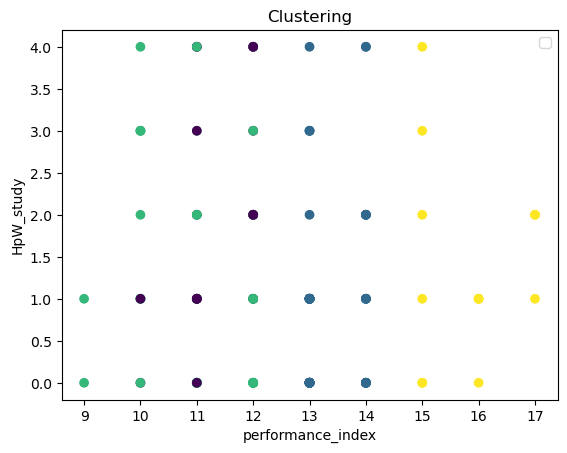

In [72]:
plt.scatter(x['performance_index'], x['HpW_study'], c=x['clusters'], cmap='viridis')
plt.xlabel('performance_index')
plt.ylabel('HpW_study')
plt.title('Clustering')
plt.legend()
plt.show()

/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_86124/3283515787.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


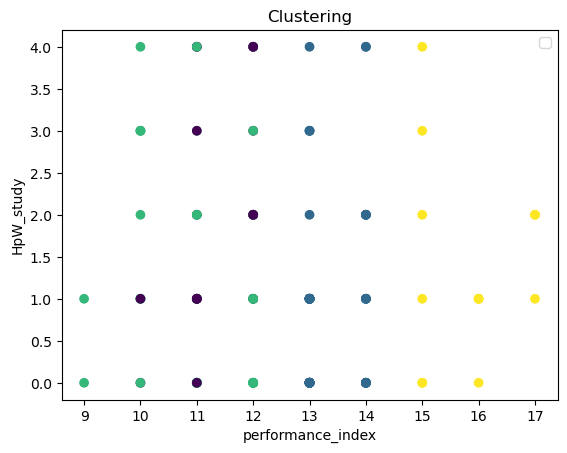

In [73]:
plt.scatter(x['performance_index'], x['HpW_study'], c=x['clusters'], cmap='viridis')
plt.xlabel('performance_index')
plt.ylabel('HpW_study')
plt.title('Clustering')
plt.legend()
plt.show()

In [74]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

calinski_harabasz = calinski_harabasz_score(x[['performance_index', 'HpW_study']], x['clusters'])


print(f"Calinski-Harabasz Score: {calinski_harabasz}")


Calinski-Harabasz Score: 50.7805735101003


In [75]:
temp = ensia_df_filtered['performance_index']

In [76]:
ensia_df_filtered['clusters']=x['clusters']
ensia_df_filtered

,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,use_planner?,1st_obstcl,2nd_obstcl,3rd_obstcl,...,Online Documents,Online Tutorials,Other Schools' Worksheets,Other Universities Courses,Pdf Course,Private Courses,The Indian Guy On Youtube ??,Worksheets,Youtube Videos,clusters
0,1,0,0,1,3,0,0,4,5,2,...,1,1,0,0,0,1,0,0,1,NaN
1,0,2,0,0,3,1,0,6,2,1,...,1,1,0,0,0,0,0,0,0,1.0
2,1,0,1,1,3,0,1,5,2,0,...,1,0,0,0,0,0,0,0,0,NaN
3,1,2,0,1,3,0,0,0,1,6,...,0,1,0,0,0,0,0,0,1,1.0
4,0,2,0,1,3,0,0,6,1,4,...,1,0,0,0,0,0,0,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0,1,0,2,0,0,0,4,2,6,...,0,0,0,0,0,0,0,0,1,1.0
271,1,0,0,1,3,2,0,2,0,4,...,1,1,0,0,0,0,0,0,1,NaN
272,1,0,0,1,3,0,0,0,2,4,...,1,0,0,0,0,0,0,0,0,NaN
273,1,0,0,1,3,1,0,2,4,6,...,1,0,0,0,0,0,0,0,1,NaN


In [77]:
x=x.drop(columns='performance_index')

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(x.drop(columns='clusters'), x['clusters'], test_size=0.2, random_state=42)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_accuracy = dt.score(X_test, y_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_accuracy = rf.score(X_test, y_test)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_accuracy = knn.score(X_test, y_test)

# Compare the accuracies
accuracies = {'Decision Tree': dt_accuracy, 'Random Forest': rf_accuracy, 'KNN': knn_accuracy}


print(f"Accuracy Comparison:")
for model, accuracy in accuracies.items():
    print(f"{model}: {accuracy}")
    


Accuracy Comparison:
Decision Tree: 0.38461538461538464
Random Forest: 0.46153846153846156
KNN: 0.38461538461538464


In [79]:
# Decision Tree
dt_train_accuracy = dt.score(X_train, y_train)
dt_test_accuracy = dt.score(X_test, y_test)

# Random Forest
rf_train_accuracy = rf.score(X_train, y_train)
rf_test_accuracy = rf.score(X_test, y_test)

# KNN
knn_train_accuracy = knn.score(X_train, y_train)
knn_test_accuracy = knn.score(X_test, y_test)


# Print the accuracies
print("Training Accuracy:")
print(f"Decision Tree: {dt_train_accuracy}")
print(f"Random Forest: {rf_train_accuracy}")
print(f"KNN: {knn_train_accuracy}")


print("\nTest Accuracy:")
print(f"Decision Tree: {dt_test_accuracy}")
print(f"Random Forest: {rf_test_accuracy}")
print(f"KNN: {knn_test_accuracy}")



Training Accuracy:
Decision Tree: 1.0
Random Forest: 1.0
KNN: 0.6372549019607843

Test Accuracy:
Decision Tree: 0.38461538461538464
Random Forest: 0.46153846153846156
KNN: 0.38461538461538464


In [80]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
rf.fit(X_train, y_train)



# Evaluate the accuracy on the test set
accuracy = rf.score(X_test, y_test)
acc = rf.score(X_train, y_train) 
print(f"Accuracy: {accuracy}")
print(f"Accuraxxcy: {acc}")


Accuracy: 0.4230769230769231
Accuraxxcy: 1.0


In [81]:
ensia_df_filtered

,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,use_planner?,1st_obstcl,2nd_obstcl,3rd_obstcl,...,Online Documents,Online Tutorials,Other Schools' Worksheets,Other Universities Courses,Pdf Course,Private Courses,The Indian Guy On Youtube ??,Worksheets,Youtube Videos,clusters
0,1,0,0,1,3,0,0,4,5,2,...,1,1,0,0,0,1,0,0,1,NaN
1,0,2,0,0,3,1,0,6,2,1,...,1,1,0,0,0,0,0,0,0,1.0
2,1,0,1,1,3,0,1,5,2,0,...,1,0,0,0,0,0,0,0,0,NaN
3,1,2,0,1,3,0,0,0,1,6,...,0,1,0,0,0,0,0,0,1,1.0
4,0,2,0,1,3,0,0,6,1,4,...,1,0,0,0,0,0,0,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0,1,0,2,0,0,0,4,2,6,...,0,0,0,0,0,0,0,0,1,1.0
271,1,0,0,1,3,2,0,2,0,4,...,1,1,0,0,0,0,0,0,1,NaN
272,1,0,0,1,3,0,0,0,2,4,...,1,0,0,0,0,0,0,0,0,NaN
273,1,0,0,1,3,1,0,2,4,6,...,1,0,0,0,0,0,0,0,1,NaN


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x.drop(columns='clusters'), x['clusters'], test_size=0.2, random_state=42)

# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Create a pipeline with standardization and MLPClassifier
pipeline = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(58,), activation='relu', solver='sgd',
                                                         random_state=42, max_iter=1000000,
                                                         ) )

#  L2 regularization, and early stopping
pipeline.named_steps['mlpclassifier'].set_params(early_stopping=True, validation_fraction=0.01, n_iter_no_change=1000000, alpha=0.00001,
                                                 learning_rate_init=0.01, max_iter=100,learning_rate = 'constant', tol=0.0000001 , momentum=0.001 
                                                 , batch_size= 10, shuffle=False, beta_1=0.09, beta_2=0.999, epsilon=1e-08, nesterovs_momentum=False)  

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the clusters for the test data
y_pred = pipeline.predict(X_test)
train = pipeline.predict(X_train) 
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
taccuracy = accuracy_score(y_train, train)
print(f"Accuracy: {accuracy}")
print(f"Train Accuracy: {taccuracy}")



Accuracy: 0.46153846153846156
Train Accuracy: 0.8921568627450981


/opt/homebrew/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [83]:
ensia_predict = ensia_df_filtered.drop(columns='performance_index') 
ensia_predict = ensia_predict[ensia_predict['clusters'].isna()] 
ensia_label = ensia_predict['clusters']
ensia_predict = ensia_predict.drop(columns='clusters')
ensia_predict

,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,use_planner?,1st_obstcl,2nd_obstcl,3rd_obstcl,...,Mentors,Online Documents,Online Tutorials,Other Schools' Worksheets,Other Universities Courses,Pdf Course,Private Courses,The Indian Guy On Youtube ??,Worksheets,Youtube Videos
0,1,0,0,1,3,0,0,4,5,2,...,0,1,1,0,0,0,1,0,0,1
2,1,0,1,1,3,0,1,5,2,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,1,3,2,0,1,4,1,2,...,0,0,1,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,2,1,6,...,0,0,0,0,0,0,0,0,0,1
8,0,0,1,3,3,0,1,1,2,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,1,0,1,2,3,0,1,2,4,6,...,0,1,0,0,0,0,0,0,0,0
271,1,0,0,1,3,2,0,2,0,4,...,0,1,1,0,0,0,0,0,0,1
272,1,0,0,1,3,0,0,0,2,4,...,0,1,0,0,0,0,0,0,0,0
273,1,0,0,1,3,1,0,2,4,6,...,0,1,0,0,0,0,0,0,0,1


In [84]:
ensia_label

0     NaN
2     NaN
6     NaN
7     NaN
8     NaN
       ..
269   NaN
271   NaN
272   NaN
273   NaN
274   NaN
Name: clusters, Length: 147, dtype: float64

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x.drop(columns='clusters'), x['clusters'], test_size=0.2, random_state=42)

# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Create a pipeline with standardization and MLPClassifier
pipeline = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(58,), activation='relu', solver='sgd',
                                                         random_state=42, max_iter=1000000,
                                                         ) )

#  L2 regularization, and early stopping
pipeline.named_steps['mlpclassifier'].set_params(early_stopping=True, validation_fraction=0.01, n_iter_no_change=1000000, alpha=0.00001,
                                                 learning_rate_init=0.01, max_iter=100,learning_rate = 'constant', tol=0.0000001 , momentum=0.001 
                                                 , batch_size= 10, shuffle=False, beta_1=0.09, beta_2=0.999, epsilon=1e-08, nesterovs_momentum=False)  

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the clusters for the test data
y_pred = pipeline.predict(X_test)
ensia_label = pipeline.predict(ensia_predict) 
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.46153846153846156


/opt/homebrew/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [86]:
ensia_label 

array([1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 3, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [87]:
ensia_predict['clusters'] = ensia_label 

In [88]:
ensia_df_filtered
ensia_predict['clusters']

0      1
2      1
6      1
7      1
8      0
      ..
269    1
271    1
272    1
273    1
274    1
Name: clusters, Length: 147, dtype: int32

In [89]:
ensia_df_filtered ['clusters'].fillna(ensia_predict['clusters'], inplace=True)

/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_86124/3224915683.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ensia_df_filtered ['clusters'].fillna(ensia_predict['clusters'], inplace=True)


In [90]:
ensia_df_filtered

,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,use_planner?,1st_obstcl,2nd_obstcl,3rd_obstcl,...,Online Documents,Online Tutorials,Other Schools' Worksheets,Other Universities Courses,Pdf Course,Private Courses,The Indian Guy On Youtube ??,Worksheets,Youtube Videos,clusters
0,1,0,0,1,3,0,0,4,5,2,...,1,1,0,0,0,1,0,0,1,1.0
1,0,2,0,0,3,1,0,6,2,1,...,1,1,0,0,0,0,0,0,0,1.0
2,1,0,1,1,3,0,1,5,2,0,...,1,0,0,0,0,0,0,0,0,1.0
3,1,2,0,1,3,0,0,0,1,6,...,0,1,0,0,0,0,0,0,1,1.0
4,0,2,0,1,3,0,0,6,1,4,...,1,0,0,0,0,0,0,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0,1,0,2,0,0,0,4,2,6,...,0,0,0,0,0,0,0,0,1,1.0
271,1,0,0,1,3,2,0,2,0,4,...,1,1,0,0,0,0,0,0,1,1.0
272,1,0,0,1,3,0,0,0,2,4,...,1,0,0,0,0,0,0,0,0,1.0
273,1,0,0,1,3,1,0,2,4,6,...,1,0,0,0,0,0,0,0,1,1.0


In [91]:
ensia_df_filtered['performance_index'] = temp 
ensia_df_filtered['performance_index']

0       0.0
1      13.0
2       0.0
3      13.0
4      11.0
       ... 
270    14.0
271     0.0
272     0.0
273     0.0
274     0.0
Name: performance_index, Length: 275, dtype: float64

In [92]:
dictmean

{0: 11.333333333333334,
 1: 13.333333333333334,
 2: 11.069767441860465,
 3: 15.76923076923077}

In [93]:
import random

def fill_performance_index(df, dictmin, dictmax):
    for index, row in df.iterrows():
        if row['performance_index'] == 0:
            cluster = row['clusters']
            min_val = dictmin.get(cluster, 0)
            max_val = dictmax.get(cluster, 0)
            df.at[index, 'performance_index'] = random.uniform(min_val, max_val)
    return df


In [94]:
fill_performance_index(ensia_df_filtered, dictmin, dictmax)

,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,use_planner?,1st_obstcl,2nd_obstcl,3rd_obstcl,...,Online Documents,Online Tutorials,Other Schools' Worksheets,Other Universities Courses,Pdf Course,Private Courses,The Indian Guy On Youtube ??,Worksheets,Youtube Videos,clusters
0,1,0,0,1,3,0,0,4,5,2,...,1,1,0,0,0,1,0,0,1,1.0
1,0,2,0,0,3,1,0,6,2,1,...,1,1,0,0,0,0,0,0,0,1.0
2,1,0,1,1,3,0,1,5,2,0,...,1,0,0,0,0,0,0,0,0,1.0
3,1,2,0,1,3,0,0,0,1,6,...,0,1,0,0,0,0,0,0,1,1.0
4,0,2,0,1,3,0,0,6,1,4,...,1,0,0,0,0,0,0,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0,1,0,2,0,0,0,4,2,6,...,0,0,0,0,0,0,0,0,1,1.0
271,1,0,0,1,3,2,0,2,0,4,...,1,1,0,0,0,0,0,0,1,1.0
272,1,0,0,1,3,0,0,0,2,4,...,1,0,0,0,0,0,0,0,0,1.0
273,1,0,0,1,3,1,0,2,4,6,...,1,0,0,0,0,0,0,0,1,1.0


In [95]:
ensia_df_filtered[['performance_index', 'clusters']]

,performance_index,clusters
0,13.029327,1.0
1,13.000000,1.0
2,13.328350,1.0
3,13.000000,1.0
4,11.000000,2.0
...,...,...
270,14.000000,1.0
271,13.350164,1.0
272,13.794398,1.0
273,13.297327,1.0


In [96]:
ensia_df_filtered.isna().sum()

gender                                    0
current_year                              0
bac_serie                                 0
HpW_study                                 0
pref_place_toStudy                        0
how_study_pref                            0
use_planner?                              0
1st_obstcl                                0
2nd_obstcl                                0
3rd_obstcl                                0
4th_obstcl                                0
5th_obstcl                                0
6th_obstcl                                0
7th_obstcl                                0
8th_obstcl                                0
pov_school_prgrm                          0
external_act                              0
motiv_join_ENSIA                          0
like_ai                                   0
infl_oth_feedback                         0
sleeping_hours                            0
presure_handling                          0
English                         

In [97]:
def add_result_column(df):
    df['result'] = df['performance_index'].apply(lambda x: 'pass' if x > 10 else 'fail')
    return df


In [98]:
add_result_column(ensia_df_filtered)

,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,use_planner?,1st_obstcl,2nd_obstcl,3rd_obstcl,...,Online Tutorials,Other Schools' Worksheets,Other Universities Courses,Pdf Course,Private Courses,The Indian Guy On Youtube ??,Worksheets,Youtube Videos,clusters,result
0,1,0,0,1,3,0,0,4,5,2,...,1,0,0,0,1,0,0,1,1.0,pass
1,0,2,0,0,3,1,0,6,2,1,...,1,0,0,0,0,0,0,0,1.0,pass
2,1,0,1,1,3,0,1,5,2,0,...,0,0,0,0,0,0,0,0,1.0,pass
3,1,2,0,1,3,0,0,0,1,6,...,1,0,0,0,0,0,0,1,1.0,pass
4,0,2,0,1,3,0,0,6,1,4,...,0,0,0,0,0,0,0,1,2.0,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0,1,0,2,0,0,0,4,2,6,...,0,0,0,0,0,0,0,1,1.0,pass
271,1,0,0,1,3,2,0,2,0,4,...,1,0,0,0,0,0,0,1,1.0,pass
272,1,0,0,1,3,0,0,0,2,4,...,0,0,0,0,0,0,0,0,1.0,pass
273,1,0,0,1,3,1,0,2,4,6,...,0,0,0,0,0,0,0,1,1.0,pass


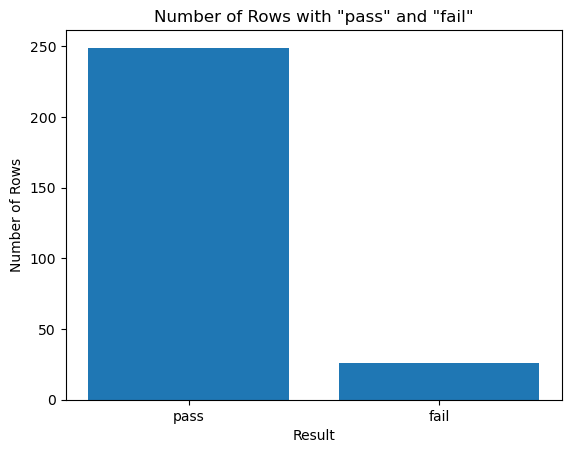

In [99]:
import matplotlib.pyplot as plt

# Count the number of rows with "pass" and "fail" in the "result" column
pass_count = len(ensia_df_filtered[ensia_df_filtered['result'] == 'pass'])
fail_count = len(ensia_df_filtered[ensia_df_filtered['result'] == 'fail'])

# Create a bar plot
plt.bar(['pass', 'fail'], [pass_count, fail_count])

# Add labels and title
plt.xlabel('Result')
plt.ylabel('Number of Rows')
plt.title('Number of Rows with "pass" and "fail"')

# Show the plot
plt.show()


In [100]:
pass_count

249

In [101]:
fail_count

26

In [102]:
ensia_final = ensia_df_filtered.drop(columns='clusters')
ensia_final['performance_index']

0      13.029327
1      13.000000
2      13.328350
3      13.000000
4      11.000000
         ...    
270    14.000000
271    13.350164
272    13.794398
273    13.297327
274    13.856361
Name: performance_index, Length: 275, dtype: float64

In [103]:
ensia_final = ensia_final.drop(columns='performance_index')


In [104]:
ensia_final

,gender,current_year,bac_serie,HpW_study,pref_place_toStudy,how_study_pref,use_planner?,1st_obstcl,2nd_obstcl,3rd_obstcl,...,Online Documents,Online Tutorials,Other Schools' Worksheets,Other Universities Courses,Pdf Course,Private Courses,The Indian Guy On Youtube ??,Worksheets,Youtube Videos,result
0,1,0,0,1,3,0,0,4,5,2,...,1,1,0,0,0,1,0,0,1,pass
1,0,2,0,0,3,1,0,6,2,1,...,1,1,0,0,0,0,0,0,0,pass
2,1,0,1,1,3,0,1,5,2,0,...,1,0,0,0,0,0,0,0,0,pass
3,1,2,0,1,3,0,0,0,1,6,...,0,1,0,0,0,0,0,0,1,pass
4,0,2,0,1,3,0,0,6,1,4,...,1,0,0,0,0,0,0,0,1,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0,1,0,2,0,0,0,4,2,6,...,0,0,0,0,0,0,0,0,1,pass
271,1,0,0,1,3,2,0,2,0,4,...,1,1,0,0,0,0,0,0,1,pass
272,1,0,0,1,3,0,0,0,2,4,...,1,0,0,0,0,0,0,0,0,pass
273,1,0,0,1,3,1,0,2,4,6,...,1,0,0,0,0,0,0,0,1,pass


In [105]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

ensia_final.isna().sum()
# Drop any missing values
ensia_final.dropna(inplace=True)

# Separate the features and target variable
X = ensia_final.drop(columns=['result'])
y = ensia_final['result']


# Apply standard scaling to normalize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Perform binary classification using a machine learning algorithm of your choice
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
acc = model.score(X_train, y_train) 
print(f"Accuracy: {accuracy}")
print(f"Accuracy: {acc}")


Accuracy: 0.8795180722891566
Accuracy: 0.953125


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define a list of classification models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(),
]

# Create empty lists to store the train and test accuracy for each model
train_accuracy = []
test_accuracy = []

# Iterate over each model
for model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Predict the target variable for the training and testing data
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate the accuracy for the training and testing data
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    # Append the accuracy values to the respective lists
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

# Print the train and test accuracy for each model
for i, model in enumerate(models):
    print(f"Model: {model.__class__.__name__}")
    print(f"Train Accuracy: {train_accuracy[i]}")
    print(f"Test Accuracy: {test_accuracy[i]}")
    print()


Model: LogisticRegression
Train Accuracy: 0.953125
Test Accuracy: 0.8795180722891566

Model: DecisionTreeClassifier
Train Accuracy: 1.0
Test Accuracy: 0.8433734939759037

Model: RandomForestClassifier
Train Accuracy: 1.0
Test Accuracy: 0.891566265060241

Model: KNeighborsClassifier
Train Accuracy: 0.9166666666666666
Test Accuracy: 0.891566265060241

Model: SVC
Train Accuracy: 0.9114583333333334
Test Accuracy: 0.891566265060241



In [107]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create an instance of the MLPClassifier with early stopping and L2 regularization
ann = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='adam', random_state=42,
                    early_stopping=True, validation_fraction=0.1, alpha=0.001 , learning_rate_init=0.01, max_iter=100 )

# Fit the model to the training data
ann.fit(X_train, y_train)

# Predict the target variable for the training and testing data
train_pred = ann.predict(X_train)
test_pred = ann.predict(X_test)

# Calculate the accuracy for the training and testing data
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

# Print the train and test accuracy
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 0.9114583333333334
Test Accuracy: 0.8554216867469879


In [108]:
import joblib

# Save the ann model
joblib.dump(ann, 'ann_model.joblib')


['ann_model.joblib']